In [ ]:
#pip install openpyxl

In [29]:
import pickle
import numpy as np
import pandas as pd
import statistics
from os import listdir
import pycaret
from pycaret.classification import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score

# Personality Only

### SWELL

In [8]:
swell_extra = pd.read_excel('Personality_Files/swell_person.xlsx')

In [9]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,Glasses,smoke,coffee,alcohol,physical,stress,heart disease,medicine,Internal control index
0,PP1,27,m,student,right,no,6,6,6,6,6,no,no,2.93
1,PP2,25,m,student,right,no,6,6,6,4,5,no,no,4.25
2,PP3,24,m,student,right,no,6,6,6,6,6,no,no,3.61
3,PP4,24,m,student,right,no,6,6,6,2,6,no,no,3.61
4,PP5,24,f,student,right,no,6,6,6,6,6,no,no,3.71
5,PP6,24,m,student,right,no,6,6,6,6,6,no,no,3.86
6,PP7,22,m,student,right,no,6,6,6,6,6,no,no,3.64
7,PP8,27,m,MSc Electrical Engineering,right,yes,6,6,6,3,6,no,no,3.57
8,PP9,28,m,PhD informatics,right,no,6,6,6,2,6,no,no,3.25
9,PP10,25,m,Information Science,right,no,6,6,6,6,6,no,no,3.39


In [61]:
#swell_personality["Occupation"].value_counts()

In [62]:
# Group all Master students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Electrical Engineering","MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="Master MKE", "MSc", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="MSc Technische Informatica", "MSc", swell_extra['Occupation'])


In [63]:
# Group all PhD students in one category

swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD informatics", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="student (Phd?)", "PhD", swell_extra['Occupation'])
swell_extra['Occupation'] = np.where(swell_extra['Occupation']=="PhD candidate", "PhD", swell_extra['Occupation'])


In [12]:
# Label Encoding categorical features

le = preprocessing.LabelEncoder()

swell_extra['Occupation'] = le.fit_transform(swell_extra['Occupation'])
swell_extra['Dominant hand'] = le.fit_transform(swell_extra['Dominant hand'])
swell_extra['Gender'] = le.fit_transform(swell_extra['Gender'])
swell_extra['Glasses'] = le.fit_transform(swell_extra['Glasses'])

In [67]:
swell_extra["heart disease"].value_counts()

In [68]:
# Drop unnecessary features

swell_extra.drop(['heart disease'], axis=1, inplace=True)
swell_extra.drop(['medicine'], axis=1, inplace=True)

In [64]:
# Keep user IDs in a separate datarame

ids = swell_extra['PP']
swell_extra.drop(['PP'], axis=1, inplace=True)

In [15]:
swell_extra

,PP,Age,Gender,Occupation,Dominant hand,Glasses,smoke,coffee,alcohol,physical,stress,heart disease,medicine,Internal control index
0,PP1,27,1,11,1,no,6,6,6,6,6,no,no,2.93
1,PP2,25,1,11,1,no,6,6,6,4,5,no,no,4.25
2,PP3,24,1,11,1,no,6,6,6,6,6,no,no,3.61
3,PP4,24,1,11,1,no,6,6,6,2,6,no,no,3.61
4,PP5,24,0,11,1,no,6,6,6,6,6,no,no,3.71
5,PP6,24,1,11,1,no,6,6,6,6,6,no,no,3.86
6,PP7,22,1,11,1,no,6,6,6,6,6,no,no,3.64
7,PP8,27,1,3,1,yes,6,6,6,3,6,no,no,3.57
8,PP9,28,1,7,1,no,6,6,6,2,6,no,no,3.25
9,PP10,25,1,2,1,no,6,6,6,6,6,no,no,3.39


In [18]:
# Create a dataframe that contains information only about gender and personality.

swell_personality = swell_extra[['Gender','Internal control index']]
swell_personality

,Gender,Internal control index
0,1,2.93
1,1,4.25
2,1,3.61
3,1,3.61
4,0,3.71
5,1,3.86
6,1,3.64
7,1,3.57
8,1,3.25
9,1,3.39


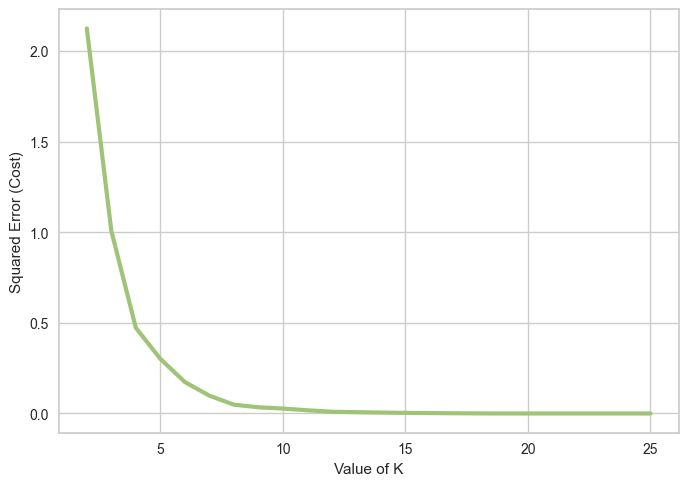

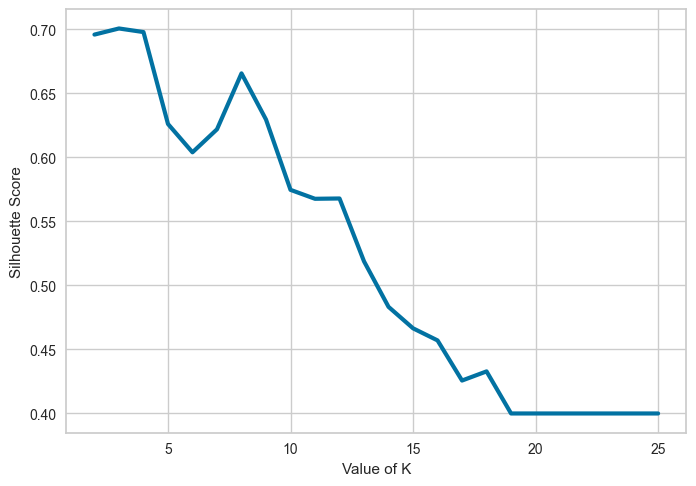

In [59]:

cost =[]
silhouette = []
#fig, ax = plt.subplots(3,2, figsize = (10,10))
#x = 0
#y = 0 
for i in range(2, 26):
    kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 0)
    kmeans.fit_predict(swell_personality)
    
    # Calculate Silhoutte Score
    score = silhouette_score(swell_personality, kmeans.labels_, metric='euclidean')
    silhouette.append(score)

    # calculates squared error
    # for the clustered points
    cost.append(kmeans.inertia_)    
    #q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    #visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax = ax[x%3][y%2])#ax[q-1][mod])
    #visualizer.fit(swell_only_personality)
    #x = x+1;
    #y = y+1;

    
# Plot the cost against K values
plt.plot(range(2, 26), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

# Plot the Silhouette Score against K values
plt.plot(range(2, 26), silhouette, color ='b', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show() # clear the plot
# the point of the elbow is the
# most optimal value for choosing k


In [60]:
kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(swell_only_personality)

In [63]:
#y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
2          7
1          4
6          4
0          3
4          2
5          2
7          2
3          1
dtype: int64

In [65]:
clusters = pd.concat([ids, y], axis=1)

In [66]:
clusters

,PP,Cluster
0,PP1,3
1,PP2,0
2,PP3,2
3,PP4,2
4,PP5,1
5,PP6,6
6,PP7,2
7,PP8,2
8,PP9,5
9,PP10,5


In [67]:
clusters.rename(columns={"PP": "id"}, inplace=True)

In [68]:
swell = pd.read_csv("Final_CSVs/swell_new.csv")

In [69]:
swell

,HR,RMSSD,SCL,id,dataset,stress
0,58,0.093757,119.071484,PP4,Train,0
1,999,999.000000,138.735573,PP19,Train,0
2,999,999.000000,999.000000,PP22,Train,1
3,999,999.000000,120.251942,PP3,Train,1
4,70,0.064568,561.332213,PP21,Train,0
...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,Test,1
3136,999,999.000000,999.000000,PP22,Test,1
3137,999,999.000000,93.893556,PP4,Test,0
3138,999,999.000000,999.000000,PP23,Test,0


In [71]:
swell_grouped = swell.join(clusters.set_index('id'), on='id')

In [90]:
swell_grouped

,HR,RMSSD,SCL,id,dataset,stress,Cluster
0,58,0.093757,119.071484,PP4,Train,0,2
1,999,999.000000,138.735573,PP19,Train,0,0
2,999,999.000000,999.000000,PP22,Train,1,1
3,999,999.000000,120.251942,PP3,Train,1,1
4,70,0.064568,561.332213,PP21,Train,0,1
...,...,...,...,...,...,...,...
3135,999,999.000000,158.138912,PP24,Test,1,0
3136,999,999.000000,999.000000,PP22,Test,1,1
3137,999,999.000000,93.893556,PP4,Test,0,2
3138,999,999.000000,999.000000,PP23,Test,0,0


In [72]:
swell_grouped.to_csv("Final_CSVs/swell_test_clusters2.csv", index = False)

In [76]:
# Drop 'dataset' and 'id' to run pycaret tests based on "Cluster".

swell_grouped = swell_grouped.drop('dataset', axis = 1)
swell_grouped = swell_grouped.drop('id', axis = 1)
swell_grouped

,HR,RMSSD,SCL,stress,Cluster
0,58,0.093757,119.071484,0,2
1,999,999.000000,138.735573,0,1
2,999,999.000000,999.000000,1,2
3,999,999.000000,120.251942,1,2
4,70,0.064568,561.332213,0,7
...,...,...,...,...,...
3135,999,999.000000,158.138912,1,6
3136,999,999.000000,999.000000,1,2
3137,999,999.000000,93.893556,0,2
3138,999,999.000000,999.000000,0,4


In [78]:
unique_participants = swell_grouped["Cluster"].unique()
personality_group = swell_grouped.groupby('Cluster')

In [79]:
accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Participant: ",participant)
    part_df = personality_group.get_group(participant)
    grid = setup(data=part_df, target='stress', html=False, silent=True, verbose=False) #fix_imbalance = True,
    best = compare_models()
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])
    print(best)

Participant:  2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
nb,Naive Bayes,0.5088,0.5309,0.4356,0.5514,0.4542,0.0294,0.0299,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
nb,Naive Bayes,0.5088,0.5309,0.4356,0.5514,0.4542,0.0294,0.0299,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
svm,SVM - Linear Kernel,0.5252,0.0000,0.5088,0.3946,0.4352,0.0540,0.0551,0.004
nb,Naive Bayes,0.5088,0.5309,0.4356,0.5514,0.4542,0.0294,0.0299,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002
svm,SVM - Linear Kernel,0.5252,0.0000,0.5088,0.3946,0.4352,0.0540,0.0551,0.004
nb,Naive Bayes,0.5088,0.5309,0.4356,0.5514,0.4542,0.0294,0.0299,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6329,0.6493,0.7360,0.6378,0.6804,0.2549,0.2618,0.033
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002
svm,SVM - Linear Kernel,0.5252,0.0000,0.5088,0.3946,0.4352,0.0540,0.0551,0.004
nb,Naive Bayes,0.5088,0.5309,0.4356,0.5514,0.4542,0.0294,0.0299,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6329,0.6493,0.7360,0.6378,0.6804,0.2549,0.2618,0.033
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002
svm,SVM - Linear Kernel,0.5252,0.0000,0.5088,0.3946,0.4352,0.0540,0.0551,0.004
nb,Naive Bayes,0.5088,0.5309,0.4356,0.5514,0.4542,0.0294,0.0299,0.002
qda,Quadratic Discriminant Analysis,0.4682,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6329,0.6493,0.7360,0.6378,0.6804,0.2549,0.2618,0.033
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
ada,Ada Boost Classifier,0.6034,0.6303,0.7391,0.6050,0.6636,0.1915,0.1989,0.012
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002
svm,SVM - Linear Kernel,0.5252,0.0000,0.5088,0.3946,0.4352,0.0540,0.0551,0.004
nb,Naive Bayes,0.5088,0.5309,0.4356,0.5514,0.4542,0.0294,0.0299,0.002
qda,Quadratic Discriminant Analysis,0.4682,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6329,0.6493,0.7360,0.6378,0.6804,0.2549,0.2618,0.033
gbc,Gradient Boosting Classifier,0.6263,0.6776,0.7323,0.6293,0.6738,0.2409,0.2502,0.011
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
ada,Ada Boost Classifier,0.6034,0.6303,0.7391,0.6050,0.6636,0.1915,0.1989,0.012
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002
svm,SVM - Linear Kernel,0.5252,0.0000,0.5088,0.3946,0.4352,0.0540,0.0551,0.004
nb,Naive Bayes,0.5088,0.5309,0.4356,0.5514,0.4542,0.0294,0.0299,0.002
qda,Quadratic Discriminant Analysis,0.4682,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6329,0.6493,0.7360,0.6378,0.6804,0.2549,0.2618,0.033
gbc,Gradient Boosting Classifier,0.6263,0.6776,0.7323,0.6293,0.6738,0.2409,0.2502,0.011
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
ada,Ada Boost Classifier,0.6034,0.6303,0.7391,0.6050,0.6636,0.1915,0.1989,0.012
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
lda,Linear Discriminant Analysis,0.5593,0.5501,0.8189,0.5572,0.6604,0.0866,0.1113,0.003
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002
svm,SVM - Linear Kernel,0.5252,0.0000,0.5088,0.3946,0.4352,0.0540,0.0551,0.004
nb,Naive Bayes,0.5088,0.5309,0.4356,0.5514,0.4542,0.0294,0.0299,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6329,0.6493,0.7360,0.6378,0.6804,0.2549,0.2618,0.033
gbc,Gradient Boosting Classifier,0.6263,0.6776,0.7323,0.6293,0.6738,0.2409,0.2502,0.011
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
et,Extra Trees Classifier,0.6117,0.6346,0.7145,0.6208,0.6624,0.2118,0.2150,0.030
ada,Ada Boost Classifier,0.6034,0.6303,0.7391,0.6050,0.6636,0.1915,0.1989,0.012
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
lda,Linear Discriminant Analysis,0.5593,0.5501,0.8189,0.5572,0.6604,0.0866,0.1113,0.003
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002
svm,SVM - Linear Kernel,0.5252,0.0000,0.5088,0.3946,0.4352,0.0540,0.0551,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6376,0.6818,0.7329,0.6422,0.6824,0.2651,0.2706,0.064
rf,Random Forest Classifier,0.6329,0.6493,0.7360,0.6378,0.6804,0.2549,0.2618,0.033
gbc,Gradient Boosting Classifier,0.6263,0.6776,0.7323,0.6293,0.6738,0.2409,0.2502,0.011
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
et,Extra Trees Classifier,0.6117,0.6346,0.7145,0.6208,0.6624,0.2118,0.2150,0.030
ada,Ada Boost Classifier,0.6034,0.6303,0.7391,0.6050,0.6636,0.1915,0.1989,0.012
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
lda,Linear Discriminant Analysis,0.5593,0.5501,0.8189,0.5572,0.6604,0.0866,0.1113,0.003
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6376,0.6818,0.7329,0.6422,0.6824,0.2651,0.2706,0.064
rf,Random Forest Classifier,0.6329,0.6493,0.7360,0.6378,0.6804,0.2549,0.2618,0.033
gbc,Gradient Boosting Classifier,0.6263,0.6776,0.7323,0.6293,0.6738,0.2409,0.2502,0.011
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
et,Extra Trees Classifier,0.6117,0.6346,0.7145,0.6208,0.6624,0.2118,0.2150,0.030
ada,Ada Boost Classifier,0.6034,0.6303,0.7391,0.6050,0.6636,0.1915,0.1989,0.012
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
lda,Linear Discriminant Analysis,0.5593,0.5501,0.8189,0.5572,0.6604,0.0866,0.1113,0.003
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6376,0.6818,0.7329,0.6422,0.6824,0.2651,0.2706,0.064
rf,Random Forest Classifier,0.6329,0.6493,0.7360,0.6378,0.6804,0.2549,0.2618,0.033
gbc,Gradient Boosting Classifier,0.6263,0.6776,0.7323,0.6293,0.6738,0.2409,0.2502,0.011
knn,K Neighbors Classifier,0.6215,0.6673,0.7017,0.6317,0.6617,0.2334,0.2369,0.241
et,Extra Trees Classifier,0.6117,0.6346,0.7145,0.6208,0.6624,0.2118,0.2150,0.030
ada,Ada Boost Classifier,0.6034,0.6303,0.7391,0.6050,0.6636,0.1915,0.1989,0.012
dt,Decision Tree Classifier,0.6002,0.5959,0.6868,0.6126,0.6449,0.1904,0.1943,0.003
lr,Logistic Regression,0.5609,0.5509,0.8314,0.5572,0.6652,0.0889,0.1151,0.574
lda,Linear Discriminant Analysis,0.5593,0.5501,0.8189,0.5572,0.6604,0.0866,0.1113,0.003
ridge,Ridge Classifier,0.5576,0.0000,0.8158,0.5562,0.6585,0.0834,0.1078,0.002


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5769, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Participant:  1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.565,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
svm,SVM - Linear Kernel,0.5210,0.0000,0.6384,0.4463,0.5120,0.0178,0.0157,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002
svm,SVM - Linear Kernel,0.5210,0.0000,0.6384,0.4463,0.5120,0.0178,0.0157,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
rf,Random Forest Classifier,0.7020,0.7958,0.7808,0.7080,0.7393,0.3923,0.4023,0.034
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002
svm,SVM - Linear Kernel,0.5210,0.0000,0.6384,0.4463,0.5120,0.0178,0.0157,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
rf,Random Forest Classifier,0.7020,0.7958,0.7808,0.7080,0.7393,0.3923,0.4023,0.034
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002
svm,SVM - Linear Kernel,0.5210,0.0000,0.6384,0.4463,0.5120,0.0178,0.0157,0.003
qda,Quadratic Discriminant Analysis,0.4540,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7158,0.7674,0.7953,0.7213,0.7539,0.4190,0.4252,0.013
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
rf,Random Forest Classifier,0.7020,0.7958,0.7808,0.7080,0.7393,0.3923,0.4023,0.034
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002
svm,SVM - Linear Kernel,0.5210,0.0000,0.6384,0.4463,0.5120,0.0178,0.0157,0.003
qda,Quadratic Discriminant Analysis,0.4540,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7158,0.7674,0.7953,0.7213,0.7539,0.4190,0.4252,0.013
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
rf,Random Forest Classifier,0.7020,0.7958,0.7808,0.7080,0.7393,0.3923,0.4023,0.034
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
gbc,Gradient Boosting Classifier,0.6964,0.7977,0.7600,0.7088,0.7318,0.3830,0.3870,0.009
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002
svm,SVM - Linear Kernel,0.5210,0.0000,0.6384,0.4463,0.5120,0.0178,0.0157,0.003
qda,Quadratic Discriminant Analysis,0.4540,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7158,0.7674,0.7953,0.7213,0.7539,0.4190,0.4252,0.013
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
rf,Random Forest Classifier,0.7020,0.7958,0.7808,0.7080,0.7393,0.3923,0.4023,0.034
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
gbc,Gradient Boosting Classifier,0.6964,0.7977,0.7600,0.7088,0.7318,0.3830,0.3870,0.009
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002
lda,Linear Discriminant Analysis,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
svm,SVM - Linear Kernel,0.5210,0.0000,0.6384,0.4463,0.5120,0.0178,0.0157,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7158,0.7674,0.7953,0.7213,0.7539,0.4190,0.4252,0.013
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
et,Extra Trees Classifier,0.7075,0.7733,0.7761,0.7154,0.7406,0.4064,0.4154,0.028
rf,Random Forest Classifier,0.7020,0.7958,0.7808,0.7080,0.7393,0.3923,0.4023,0.034
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
gbc,Gradient Boosting Classifier,0.6964,0.7977,0.7600,0.7088,0.7318,0.3830,0.3870,0.009
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002
lda,Linear Discriminant Analysis,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7158,0.7674,0.7953,0.7213,0.7539,0.4190,0.4252,0.013
lightgbm,Light Gradient Boosting Machine,0.7078,0.8097,0.7755,0.7190,0.7432,0.4050,0.4113,0.040
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
et,Extra Trees Classifier,0.7075,0.7733,0.7761,0.7154,0.7406,0.4064,0.4154,0.028
rf,Random Forest Classifier,0.7020,0.7958,0.7808,0.7080,0.7393,0.3923,0.4023,0.034
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
gbc,Gradient Boosting Classifier,0.6964,0.7977,0.7600,0.7088,0.7318,0.3830,0.3870,0.009
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7158,0.7674,0.7953,0.7213,0.7539,0.4190,0.4252,0.013
lightgbm,Light Gradient Boosting Machine,0.7078,0.8097,0.7755,0.7190,0.7432,0.4050,0.4113,0.040
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
et,Extra Trees Classifier,0.7075,0.7733,0.7761,0.7154,0.7406,0.4064,0.4154,0.028
rf,Random Forest Classifier,0.7020,0.7958,0.7808,0.7080,0.7393,0.3923,0.4023,0.034
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
gbc,Gradient Boosting Classifier,0.6964,0.7977,0.7600,0.7088,0.7318,0.3830,0.3870,0.009
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7158,0.7674,0.7953,0.7213,0.7539,0.4190,0.4252,0.013
lightgbm,Light Gradient Boosting Machine,0.7078,0.8097,0.7755,0.7190,0.7432,0.4050,0.4113,0.040
knn,K Neighbors Classifier,0.7077,0.7703,0.7405,0.7309,0.7316,0.4100,0.4150,0.005
et,Extra Trees Classifier,0.7075,0.7733,0.7761,0.7154,0.7406,0.4064,0.4154,0.028
rf,Random Forest Classifier,0.7020,0.7958,0.7808,0.7080,0.7393,0.3923,0.4023,0.034
dt,Decision Tree Classifier,0.6991,0.6995,0.7805,0.7066,0.7392,0.3854,0.3928,0.003
gbc,Gradient Boosting Classifier,0.6964,0.7977,0.7600,0.7088,0.7318,0.3830,0.3870,0.009
lr,Logistic Regression,0.5650,0.6333,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
nb,Naive Bayes,0.5650,0.6215,0.6813,0.5838,0.6226,0.1082,0.1186,0.003
ridge,Ridge Classifier,0.5650,0.0000,0.6813,0.5838,0.6226,0.1082,0.1186,0.002


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=3964)
Participant:  7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003
svm,SVM - Linear Kernel,0.4809,0.0000,0.3639,0.2377,0.2784,-0.0356,-0.0461,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003
svm,SVM - Linear Kernel,0.4809,0.0000,0.3639,0.2377,0.2784,-0.0356,-0.0461,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
rf,Random Forest Classifier,0.6540,0.7469,0.6806,0.6771,0.6579,0.3091,0.3264,0.031
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003
svm,SVM - Linear Kernel,0.4809,0.0000,0.3639,0.2377,0.2784,-0.0356,-0.0461,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
rf,Random Forest Classifier,0.6540,0.7469,0.6806,0.6771,0.6579,0.3091,0.3264,0.031
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003
qda,Quadratic Discriminant Analysis,0.4941,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004
svm,SVM - Linear Kernel,0.4809,0.0000,0.3639,0.2377,0.2784,-0.0356,-0.0461,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6901,0.7253,0.7653,0.6711,0.7101,0.3796,0.3933,0.011
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
rf,Random Forest Classifier,0.6540,0.7469,0.6806,0.6771,0.6579,0.3091,0.3264,0.031
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003
qda,Quadratic Discriminant Analysis,0.4941,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004
svm,SVM - Linear Kernel,0.4809,0.0000,0.3639,0.2377,0.2784,-0.0356,-0.0461,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6901,0.7253,0.7653,0.6711,0.7101,0.3796,0.3933,0.011
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
gbc,Gradient Boosting Classifier,0.6592,0.7315,0.7375,0.6570,0.6853,0.3166,0.3228,0.009
rf,Random Forest Classifier,0.6540,0.7469,0.6806,0.6771,0.6579,0.3091,0.3264,0.031
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003
qda,Quadratic Discriminant Analysis,0.4941,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004
svm,SVM - Linear Kernel,0.4809,0.0000,0.3639,0.2377,0.2784,-0.0356,-0.0461,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6901,0.7253,0.7653,0.6711,0.7101,0.3796,0.3933,0.011
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
gbc,Gradient Boosting Classifier,0.6592,0.7315,0.7375,0.6570,0.6853,0.3166,0.3228,0.009
rf,Random Forest Classifier,0.6540,0.7469,0.6806,0.6771,0.6579,0.3091,0.3264,0.031
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lda,Linear Discriminant Analysis,0.5441,0.5795,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003
qda,Quadratic Discriminant Analysis,0.4941,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6901,0.7253,0.7653,0.6711,0.7101,0.3796,0.3933,0.011
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
gbc,Gradient Boosting Classifier,0.6592,0.7315,0.7375,0.6570,0.6853,0.3166,0.3228,0.009
rf,Random Forest Classifier,0.6540,0.7469,0.6806,0.6771,0.6579,0.3091,0.3264,0.031
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
et,Extra Trees Classifier,0.6482,0.7355,0.6792,0.6690,0.6560,0.2955,0.3100,0.029
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lda,Linear Discriminant Analysis,0.5441,0.5795,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lr,Logistic Regression,0.5379,0.5809,0.7528,0.5348,0.6188,0.0759,0.0964,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6901,0.7253,0.7653,0.6711,0.7101,0.3796,0.3933,0.011
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
lightgbm,Light Gradient Boosting Machine,0.6713,0.7486,0.6556,0.6977,0.6667,0.3454,0.3547,0.035
gbc,Gradient Boosting Classifier,0.6592,0.7315,0.7375,0.6570,0.6853,0.3166,0.3228,0.009
rf,Random Forest Classifier,0.6540,0.7469,0.6806,0.6771,0.6579,0.3091,0.3264,0.031
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
et,Extra Trees Classifier,0.6482,0.7355,0.6792,0.6690,0.6560,0.2955,0.3100,0.029
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lda,Linear Discriminant Analysis,0.5441,0.5795,0.7653,0.5381,0.6249,0.0884,0.1182,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6901,0.7253,0.7653,0.6711,0.7101,0.3796,0.3933,0.011
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
lightgbm,Light Gradient Boosting Machine,0.6713,0.7486,0.6556,0.6977,0.6667,0.3454,0.3547,0.035
gbc,Gradient Boosting Classifier,0.6592,0.7315,0.7375,0.6570,0.6853,0.3166,0.3228,0.009
rf,Random Forest Classifier,0.6540,0.7469,0.6806,0.6771,0.6579,0.3091,0.3264,0.031
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
et,Extra Trees Classifier,0.6482,0.7355,0.6792,0.6690,0.6560,0.2955,0.3100,0.029
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lda,Linear Discriminant Analysis,0.5441,0.5795,0.7653,0.5381,0.6249,0.0884,0.1182,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.6901,0.7253,0.7653,0.6711,0.7101,0.3796,0.3933,0.011
knn,K Neighbors Classifier,0.6768,0.7254,0.7736,0.6593,0.7069,0.3516,0.3652,0.005
lightgbm,Light Gradient Boosting Machine,0.6713,0.7486,0.6556,0.6977,0.6667,0.3454,0.3547,0.035
gbc,Gradient Boosting Classifier,0.6592,0.7315,0.7375,0.6570,0.6853,0.3166,0.3228,0.009
rf,Random Forest Classifier,0.6540,0.7469,0.6806,0.6771,0.6579,0.3091,0.3264,0.031
dt,Decision Tree Classifier,0.6529,0.6535,0.6792,0.6705,0.6624,0.3064,0.3178,0.003
et,Extra Trees Classifier,0.6482,0.7355,0.6792,0.6690,0.6560,0.2955,0.3100,0.029
nb,Naive Bayes,0.6107,0.7118,0.8347,0.5942,0.6874,0.2191,0.2517,0.003
ridge,Ridge Classifier,0.5441,0.0000,0.7653,0.5381,0.6249,0.0884,0.1182,0.002
lda,Linear Discriminant Analysis,0.5441,0.5795,0.7653,0.5381,0.6249,0.0884,0.1182,0.002


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=7786)
Participant:  4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003
svm,SVM - Linear Kernel,0.5000,0.0000,0.2000,0.1000,0.1333,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003
svm,SVM - Linear Kernel,0.5000,0.0000,0.2000,0.1000,0.1333,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.9012,0.7444,0.8989,0.7977,0.6444,0.6680,0.032
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003
svm,SVM - Linear Kernel,0.5000,0.0000,0.2000,0.1000,0.1333,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.9012,0.7444,0.8989,0.7977,0.6444,0.6680,0.032
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003
svm,SVM - Linear Kernel,0.5000,0.0000,0.2000,0.1000,0.1333,0.0000,0.0000,0.004
qda,Quadratic Discriminant Analysis,0.5000,0.0000,0.9000,0.4500,0.6000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.9012,0.7444,0.8989,0.7977,0.6444,0.6680,0.032
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
ada,Ada Boost Classifier,0.7944,0.8660,0.7222,0.8653,0.7710,0.5889,0.6123,0.012
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003
svm,SVM - Linear Kernel,0.5000,0.0000,0.2000,0.1000,0.1333,0.0000,0.0000,0.004
qda,Quadratic Discriminant Analysis,0.5000,0.0000,0.9000,0.4500,0.6000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.9012,0.7444,0.8989,0.7977,0.6444,0.6680,0.032
gbc,Gradient Boosting Classifier,0.8222,0.8864,0.7556,0.8888,0.7994,0.6444,0.6678,0.008
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
ada,Ada Boost Classifier,0.7944,0.8660,0.7222,0.8653,0.7710,0.5889,0.6123,0.012
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003
svm,SVM - Linear Kernel,0.5000,0.0000,0.2000,0.1000,0.1333,0.0000,0.0000,0.004
qda,Quadratic Discriminant Analysis,0.5000,0.0000,0.9000,0.4500,0.6000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.9012,0.7444,0.8989,0.7977,0.6444,0.6680,0.032
gbc,Gradient Boosting Classifier,0.8222,0.8864,0.7556,0.8888,0.7994,0.6444,0.6678,0.008
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
ada,Ada Boost Classifier,0.7944,0.8660,0.7222,0.8653,0.7710,0.5889,0.6123,0.012
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
lda,Linear Discriminant Analysis,0.5611,0.7000,0.6333,0.5461,0.5725,0.1222,0.1318,0.003
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003
svm,SVM - Linear Kernel,0.5000,0.0000,0.2000,0.1000,0.1333,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.9012,0.7444,0.8989,0.7977,0.6444,0.6680,0.032
gbc,Gradient Boosting Classifier,0.8222,0.8864,0.7556,0.8888,0.7994,0.6444,0.6678,0.008
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
ada,Ada Boost Classifier,0.7944,0.8660,0.7222,0.8653,0.7710,0.5889,0.6123,0.012
et,Extra Trees Classifier,0.7778,0.8778,0.6889,0.8622,0.7429,0.5556,0.5841,0.028
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
lda,Linear Discriminant Analysis,0.5611,0.7000,0.6333,0.5461,0.5725,0.1222,0.1318,0.003
nb,Naive Bayes,0.5444,0.5951,0.3333,0.5900,0.4094,0.0889,0.1031,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.9012,0.7444,0.8989,0.7977,0.6444,0.6680,0.032
gbc,Gradient Boosting Classifier,0.8222,0.8864,0.7556,0.8888,0.7994,0.6444,0.6678,0.008
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
ada,Ada Boost Classifier,0.7944,0.8660,0.7222,0.8653,0.7710,0.5889,0.6123,0.012
et,Extra Trees Classifier,0.7778,0.8778,0.6889,0.8622,0.7429,0.5556,0.5841,0.028
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lightgbm,Light Gradient Boosting Machine,0.7667,0.8481,0.7111,0.8114,0.7394,0.5333,0.5548,0.040
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
lda,Linear Discriminant Analysis,0.5611,0.7000,0.6333,0.5461,0.5725,0.1222,0.1318,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.9012,0.7444,0.8989,0.7977,0.6444,0.6680,0.032
gbc,Gradient Boosting Classifier,0.8222,0.8864,0.7556,0.8888,0.7994,0.6444,0.6678,0.008
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
ada,Ada Boost Classifier,0.7944,0.8660,0.7222,0.8653,0.7710,0.5889,0.6123,0.012
et,Extra Trees Classifier,0.7778,0.8778,0.6889,0.8622,0.7429,0.5556,0.5841,0.028
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lightgbm,Light Gradient Boosting Machine,0.7667,0.8481,0.7111,0.8114,0.7394,0.5333,0.5548,0.040
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
lda,Linear Discriminant Analysis,0.5611,0.7000,0.6333,0.5461,0.5725,0.1222,0.1318,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8222,0.9012,0.7444,0.8989,0.7977,0.6444,0.6680,0.032
gbc,Gradient Boosting Classifier,0.8222,0.8864,0.7556,0.8888,0.7994,0.6444,0.6678,0.008
dt,Decision Tree Classifier,0.8000,0.8506,0.7222,0.8781,0.7688,0.6000,0.6270,0.003
ada,Ada Boost Classifier,0.7944,0.8660,0.7222,0.8653,0.7710,0.5889,0.6123,0.012
et,Extra Trees Classifier,0.7778,0.8778,0.6889,0.8622,0.7429,0.5556,0.5841,0.028
knn,K Neighbors Classifier,0.7667,0.8877,0.8222,0.7952,0.7682,0.5333,0.5909,0.006
lightgbm,Light Gradient Boosting Machine,0.7667,0.8481,0.7111,0.8114,0.7394,0.5333,0.5548,0.040
lr,Logistic Regression,0.5944,0.7407,0.6667,0.5841,0.6134,0.1889,0.1942,0.005
ridge,Ridge Classifier,0.5778,0.0000,0.6556,0.5626,0.5927,0.1556,0.1649,0.002
lda,Linear Discriminant Analysis,0.5611,0.7000,0.6333,0.5461,0.5725,0.1222,0.1318,0.003


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4900, verbose=0,
                       warm_start=False)
Participant:  3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5333,0.625,0.64,0.5171,0.5669,0.0176,-0.0098,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6889,0.745,0.71,0.7567,0.6933,0.3764,0.4225,0.005
lr,Logistic Regression,0.5333,0.625,0.64,0.5171,0.5669,0.0176,-0.0098,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6889,0.745,0.71,0.7567,0.6933,0.3764,0.4225,0.005
nb,Naive Bayes,0.5444,0.580,0.40,0.6400,0.4651,0.1013,0.1239,0.003
lr,Logistic Regression,0.5333,0.625,0.64,0.5171,0.5669,0.0176,-0.0098,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6889,0.745,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.665,0.665,0.7062,0.6624,0.3306,0.3583,0.003
nb,Naive Bayes,0.5444,0.580,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lr,Logistic Regression,0.5333,0.625,0.640,0.5171,0.5669,0.0176,-0.0098,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6889,0.745,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.665,0.665,0.7062,0.6624,0.3306,0.3583,0.003
nb,Naive Bayes,0.5444,0.580,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lr,Logistic Regression,0.5333,0.625,0.640,0.5171,0.5669,0.0176,-0.0098,0.005
svm,SVM - Linear Kernel,0.5222,0.000,0.800,0.4333,0.5615,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6889,0.745,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.665,0.665,0.7062,0.6624,0.3306,0.3583,0.003
ridge,Ridge Classifier,0.5667,0.000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
nb,Naive Bayes,0.5444,0.580,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lr,Logistic Regression,0.5333,0.625,0.640,0.5171,0.5669,0.0176,-0.0098,0.005
svm,SVM - Linear Kernel,0.5222,0.000,0.800,0.4333,0.5615,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6889,0.7450,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.6650,0.665,0.7062,0.6624,0.3306,0.3583,0.003
rf,Random Forest Classifier,0.6667,0.7225,0.690,0.7243,0.6799,0.3308,0.3703,0.031
ridge,Ridge Classifier,0.5667,0.0000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
nb,Naive Bayes,0.5444,0.5800,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lr,Logistic Regression,0.5333,0.6250,0.640,0.5171,0.5669,0.0176,-0.0098,0.005
svm,SVM - Linear Kernel,0.5222,0.0000,0.800,0.4333,0.5615,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6889,0.7450,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.6650,0.665,0.7062,0.6624,0.3306,0.3583,0.003
rf,Random Forest Classifier,0.6667,0.7225,0.690,0.7243,0.6799,0.3308,0.3703,0.031
ridge,Ridge Classifier,0.5667,0.0000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
nb,Naive Bayes,0.5444,0.5800,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lr,Logistic Regression,0.5333,0.6250,0.640,0.5171,0.5669,0.0176,-0.0098,0.005
qda,Quadratic Discriminant Analysis,0.5333,0.0000,0.900,0.4889,0.6330,0.0000,0.0000,0.003
svm,SVM - Linear Kernel,0.5222,0.0000,0.800,0.4333,0.5615,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6889,0.7450,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.6650,0.665,0.7062,0.6624,0.3306,0.3583,0.003
rf,Random Forest Classifier,0.6667,0.7225,0.690,0.7243,0.6799,0.3308,0.3703,0.031
ada,Ada Boost Classifier,0.6333,0.7000,0.645,0.6945,0.6362,0.2546,0.2918,0.012
ridge,Ridge Classifier,0.5667,0.0000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
nb,Naive Bayes,0.5444,0.5800,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lr,Logistic Regression,0.5333,0.6250,0.640,0.5171,0.5669,0.0176,-0.0098,0.005
qda,Quadratic Discriminant Analysis,0.5333,0.0000,0.900,0.4889,0.6330,0.0000,0.0000,0.003
svm,SVM - Linear Kernel,0.5222,0.0000,0.800,0.4333,0.5615,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7111,0.7150,0.725,0.7610,0.7154,0.4152,0.4570,0.008
knn,K Neighbors Classifier,0.6889,0.7450,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.6650,0.665,0.7062,0.6624,0.3306,0.3583,0.003
rf,Random Forest Classifier,0.6667,0.7225,0.690,0.7243,0.6799,0.3308,0.3703,0.031
ada,Ada Boost Classifier,0.6333,0.7000,0.645,0.6945,0.6362,0.2546,0.2918,0.012
ridge,Ridge Classifier,0.5667,0.0000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
nb,Naive Bayes,0.5444,0.5800,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lr,Logistic Regression,0.5333,0.6250,0.640,0.5171,0.5669,0.0176,-0.0098,0.005
qda,Quadratic Discriminant Analysis,0.5333,0.0000,0.900,0.4889,0.6330,0.0000,0.0000,0.003
svm,SVM - Linear Kernel,0.5222,0.0000,0.800,0.4333,0.5615,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7111,0.7150,0.725,0.7610,0.7154,0.4152,0.4570,0.008
knn,K Neighbors Classifier,0.6889,0.7450,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.6650,0.665,0.7062,0.6624,0.3306,0.3583,0.003
rf,Random Forest Classifier,0.6667,0.7225,0.690,0.7243,0.6799,0.3308,0.3703,0.031
ada,Ada Boost Classifier,0.6333,0.7000,0.645,0.6945,0.6362,0.2546,0.2918,0.012
ridge,Ridge Classifier,0.5667,0.0000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
nb,Naive Bayes,0.5444,0.5800,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lda,Linear Discriminant Analysis,0.5444,0.5950,0.640,0.5321,0.5736,0.0417,0.0152,0.003
lr,Logistic Regression,0.5333,0.6250,0.640,0.5171,0.5669,0.0176,-0.0098,0.005
qda,Quadratic Discriminant Analysis,0.5333,0.0000,0.900,0.4889,0.6330,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7111,0.7150,0.725,0.7610,0.7154,0.4152,0.4570,0.008
knn,K Neighbors Classifier,0.6889,0.7450,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.6650,0.665,0.7062,0.6624,0.3306,0.3583,0.003
rf,Random Forest Classifier,0.6667,0.7225,0.690,0.7243,0.6799,0.3308,0.3703,0.031
et,Extra Trees Classifier,0.6556,0.7500,0.690,0.7154,0.6735,0.3052,0.3501,0.027
ada,Ada Boost Classifier,0.6333,0.7000,0.645,0.6945,0.6362,0.2546,0.2918,0.012
ridge,Ridge Classifier,0.5667,0.0000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
nb,Naive Bayes,0.5444,0.5800,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lda,Linear Discriminant Analysis,0.5444,0.5950,0.640,0.5321,0.5736,0.0417,0.0152,0.003
lr,Logistic Regression,0.5333,0.6250,0.640,0.5171,0.5669,0.0176,-0.0098,0.005


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7111,0.7150,0.725,0.7610,0.7154,0.4152,0.4570,0.008
knn,K Neighbors Classifier,0.6889,0.7450,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.6650,0.665,0.7062,0.6624,0.3306,0.3583,0.003
rf,Random Forest Classifier,0.6667,0.7225,0.690,0.7243,0.6799,0.3308,0.3703,0.031
et,Extra Trees Classifier,0.6556,0.7500,0.690,0.7154,0.6735,0.3052,0.3501,0.027
ada,Ada Boost Classifier,0.6333,0.7000,0.645,0.6945,0.6362,0.2546,0.2918,0.012
ridge,Ridge Classifier,0.5667,0.0000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
lightgbm,Light Gradient Boosting Machine,0.5667,0.5425,0.535,0.6188,0.5413,0.1406,0.1423,0.004
nb,Naive Bayes,0.5444,0.5800,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lda,Linear Discriminant Analysis,0.5444,0.5950,0.640,0.5321,0.5736,0.0417,0.0152,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7111,0.7150,0.725,0.7610,0.7154,0.4152,0.4570,0.008
knn,K Neighbors Classifier,0.6889,0.7450,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.6650,0.665,0.7062,0.6624,0.3306,0.3583,0.003
rf,Random Forest Classifier,0.6667,0.7225,0.690,0.7243,0.6799,0.3308,0.3703,0.031
et,Extra Trees Classifier,0.6556,0.7500,0.690,0.7154,0.6735,0.3052,0.3501,0.027
ada,Ada Boost Classifier,0.6333,0.7000,0.645,0.6945,0.6362,0.2546,0.2918,0.012
ridge,Ridge Classifier,0.5667,0.0000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
lightgbm,Light Gradient Boosting Machine,0.5667,0.5425,0.535,0.6188,0.5413,0.1406,0.1423,0.004
nb,Naive Bayes,0.5444,0.5800,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lda,Linear Discriminant Analysis,0.5444,0.5950,0.640,0.5321,0.5736,0.0417,0.0152,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7111,0.7150,0.725,0.7610,0.7154,0.4152,0.4570,0.008
knn,K Neighbors Classifier,0.6889,0.7450,0.710,0.7567,0.6933,0.3764,0.4225,0.005
dt,Decision Tree Classifier,0.6667,0.6650,0.665,0.7062,0.6624,0.3306,0.3583,0.003
rf,Random Forest Classifier,0.6667,0.7225,0.690,0.7243,0.6799,0.3308,0.3703,0.031
et,Extra Trees Classifier,0.6556,0.7500,0.690,0.7154,0.6735,0.3052,0.3501,0.027
ada,Ada Boost Classifier,0.6333,0.7000,0.645,0.6945,0.6362,0.2546,0.2918,0.012
ridge,Ridge Classifier,0.5667,0.0000,0.620,0.5576,0.5781,0.0974,0.0820,0.003
lightgbm,Light Gradient Boosting Machine,0.5667,0.5425,0.535,0.6188,0.5413,0.1406,0.1423,0.004
nb,Naive Bayes,0.5444,0.5800,0.400,0.6400,0.4651,0.1013,0.1239,0.003
lda,Linear Discriminant Analysis,0.5444,0.5950,0.640,0.5321,0.5736,0.0417,0.0152,0.003


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=8736, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Participant:  6


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.708,0.3357,0.3383,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002
svm,SVM - Linear Kernel,0.6165,0.0000,0.5813,0.5595,0.5586,0.2442,0.2498,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002
svm,SVM - Linear Kernel,0.6165,0.0000,0.5813,0.5595,0.5586,0.2442,0.2498,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
rf,Random Forest Classifier,0.7338,0.8056,0.8361,0.7212,0.7740,0.4542,0.4626,0.031
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002
svm,SVM - Linear Kernel,0.6165,0.0000,0.5813,0.5595,0.5586,0.2442,0.2498,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
rf,Random Forest Classifier,0.7338,0.8056,0.8361,0.7212,0.7740,0.4542,0.4626,0.031
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002
svm,SVM - Linear Kernel,0.6165,0.0000,0.5813,0.5595,0.5586,0.2442,0.2498,0.004
qda,Quadratic Discriminant Analysis,0.4538,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8152,0.8216,0.8726,0.8079,0.8378,0.6239,0.6289,0.012
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
rf,Random Forest Classifier,0.7338,0.8056,0.8361,0.7212,0.7740,0.4542,0.4626,0.031
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002
svm,SVM - Linear Kernel,0.6165,0.0000,0.5813,0.5595,0.5586,0.2442,0.2498,0.004
qda,Quadratic Discriminant Analysis,0.4538,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8152,0.8216,0.8726,0.8079,0.8378,0.6239,0.6289,0.012
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
gbc,Gradient Boosting Classifier,0.7926,0.8335,0.8413,0.7926,0.8155,0.5792,0.5820,0.009
rf,Random Forest Classifier,0.7338,0.8056,0.8361,0.7212,0.7740,0.4542,0.4626,0.031
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002
svm,SVM - Linear Kernel,0.6165,0.0000,0.5813,0.5595,0.5586,0.2442,0.2498,0.004
qda,Quadratic Discriminant Analysis,0.4538,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8152,0.8216,0.8726,0.8079,0.8378,0.6239,0.6289,0.012
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
gbc,Gradient Boosting Classifier,0.7926,0.8335,0.8413,0.7926,0.8155,0.5792,0.5820,0.009
rf,Random Forest Classifier,0.7338,0.8056,0.8361,0.7212,0.7740,0.4542,0.4626,0.031
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lda,Linear Discriminant Analysis,0.6753,0.7270,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002
svm,SVM - Linear Kernel,0.6165,0.0000,0.5813,0.5595,0.5586,0.2442,0.2498,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8152,0.8216,0.8726,0.8079,0.8378,0.6239,0.6289,0.012
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
gbc,Gradient Boosting Classifier,0.7926,0.8335,0.8413,0.7926,0.8155,0.5792,0.5820,0.009
rf,Random Forest Classifier,0.7338,0.8056,0.8361,0.7212,0.7740,0.4542,0.4626,0.031
et,Extra Trees Classifier,0.7338,0.7595,0.8261,0.7254,0.7719,0.4556,0.4625,0.028
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lda,Linear Discriminant Analysis,0.6753,0.7270,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003
nb,Naive Bayes,0.6502,0.6667,0.4626,0.8262,0.5884,0.3258,0.3699,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8152,0.8216,0.8726,0.8079,0.8378,0.6239,0.6289,0.012
lightgbm,Light Gradient Boosting Machine,0.8125,0.8373,0.8571,0.8138,0.8331,0.6197,0.6247,0.004
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
gbc,Gradient Boosting Classifier,0.7926,0.8335,0.8413,0.7926,0.8155,0.5792,0.5820,0.009
rf,Random Forest Classifier,0.7338,0.8056,0.8361,0.7212,0.7740,0.4542,0.4626,0.031
et,Extra Trees Classifier,0.7338,0.7595,0.8261,0.7254,0.7719,0.4556,0.4625,0.028
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lda,Linear Discriminant Analysis,0.6753,0.7270,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8152,0.8216,0.8726,0.8079,0.8378,0.6239,0.6289,0.012
lightgbm,Light Gradient Boosting Machine,0.8125,0.8373,0.8571,0.8138,0.8331,0.6197,0.6247,0.004
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
gbc,Gradient Boosting Classifier,0.7926,0.8335,0.8413,0.7926,0.8155,0.5792,0.5820,0.009
rf,Random Forest Classifier,0.7338,0.8056,0.8361,0.7212,0.7740,0.4542,0.4626,0.031
et,Extra Trees Classifier,0.7338,0.7595,0.8261,0.7254,0.7719,0.4556,0.4625,0.028
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lda,Linear Discriminant Analysis,0.6753,0.7270,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8152,0.8216,0.8726,0.8079,0.8378,0.6239,0.6289,0.012
lightgbm,Light Gradient Boosting Machine,0.8125,0.8373,0.8571,0.8138,0.8331,0.6197,0.6247,0.004
knn,K Neighbors Classifier,0.8096,0.8194,0.8571,0.8109,0.8313,0.6136,0.6191,0.006
gbc,Gradient Boosting Classifier,0.7926,0.8335,0.8413,0.7926,0.8155,0.5792,0.5820,0.009
rf,Random Forest Classifier,0.7338,0.8056,0.8361,0.7212,0.7740,0.4542,0.4626,0.031
et,Extra Trees Classifier,0.7338,0.7595,0.8261,0.7254,0.7719,0.4556,0.4625,0.028
dt,Decision Tree Classifier,0.7255,0.6745,0.8258,0.7156,0.7661,0.4377,0.4461,0.003
ridge,Ridge Classifier,0.6753,0.0000,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lda,Linear Discriminant Analysis,0.6753,0.7270,0.7342,0.6927,0.7113,0.3411,0.3438,0.002
lr,Logistic Regression,0.6725,0.7266,0.7289,0.6914,0.7080,0.3357,0.3383,0.003


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4951)
Participant:  0


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.5483,0.5533,0.483,0.5946,0.5154,0.1069,0.112,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
nb,Naive Bayes,0.4905,0.5101,0.5044,0.5188,0.4954,-0.0206,-0.0230,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
nb,Naive Bayes,0.4905,0.5101,0.5044,0.5188,0.4954,-0.0206,-0.0230,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
svm,SVM - Linear Kernel,0.5055,0.0000,0.5264,0.3858,0.4336,0.0023,-0.0121,0.003
nb,Naive Bayes,0.4905,0.5101,0.5044,0.5188,0.4954,-0.0206,-0.0230,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
svm,SVM - Linear Kernel,0.5055,0.0000,0.5264,0.3858,0.4336,0.0023,-0.0121,0.003
nb,Naive Bayes,0.4905,0.5101,0.5044,0.5188,0.4954,-0.0206,-0.0230,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
rf,Random Forest Classifier,0.8095,0.9113,0.8187,0.8332,0.8198,0.6175,0.6270,0.036
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
svm,SVM - Linear Kernel,0.5055,0.0000,0.5264,0.3858,0.4336,0.0023,-0.0121,0.003
nb,Naive Bayes,0.4905,0.5101,0.5044,0.5188,0.4954,-0.0206,-0.0230,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
rf,Random Forest Classifier,0.8095,0.9113,0.8187,0.8332,0.8198,0.6175,0.6270,0.036
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
svm,SVM - Linear Kernel,0.5055,0.0000,0.5264,0.3858,0.4336,0.0023,-0.0121,0.003
nb,Naive Bayes,0.4905,0.5101,0.5044,0.5188,0.4954,-0.0206,-0.0230,0.002
qda,Quadratic Discriminant Analysis,0.4671,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
rf,Random Forest Classifier,0.8095,0.9113,0.8187,0.8332,0.8198,0.6175,0.6270,0.036
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
ada,Ada Boost Classifier,0.7942,0.8661,0.8621,0.7806,0.8160,0.5832,0.5941,0.012
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
svm,SVM - Linear Kernel,0.5055,0.0000,0.5264,0.3858,0.4336,0.0023,-0.0121,0.003
nb,Naive Bayes,0.4905,0.5101,0.5044,0.5188,0.4954,-0.0206,-0.0230,0.002
qda,Quadratic Discriminant Analysis,0.4671,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
rf,Random Forest Classifier,0.8095,0.9113,0.8187,0.8332,0.8198,0.6175,0.6270,0.036
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
gbc,Gradient Boosting Classifier,0.8015,0.8935,0.8110,0.8196,0.8122,0.6018,0.6074,0.010
ada,Ada Boost Classifier,0.7942,0.8661,0.8621,0.7806,0.8160,0.5832,0.5941,0.012
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
svm,SVM - Linear Kernel,0.5055,0.0000,0.5264,0.3858,0.4336,0.0023,-0.0121,0.003
nb,Naive Bayes,0.4905,0.5101,0.5044,0.5188,0.4954,-0.0206,-0.0230,0.002
qda,Quadratic Discriminant Analysis,0.4671,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
rf,Random Forest Classifier,0.8095,0.9113,0.8187,0.8332,0.8198,0.6175,0.6270,0.036
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
gbc,Gradient Boosting Classifier,0.8015,0.8935,0.8110,0.8196,0.8122,0.6018,0.6074,0.010
ada,Ada Boost Classifier,0.7942,0.8661,0.8621,0.7806,0.8160,0.5832,0.5941,0.012
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
lda,Linear Discriminant Analysis,0.5483,0.5205,0.4830,0.5946,0.5154,0.1069,0.1120,0.002
svm,SVM - Linear Kernel,0.5055,0.0000,0.5264,0.3858,0.4336,0.0023,-0.0121,0.003
nb,Naive Bayes,0.4905,0.5101,0.5044,0.5188,0.4954,-0.0206,-0.0230,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
et,Extra Trees Classifier,0.8134,0.8978,0.8049,0.8560,0.8205,0.6265,0.6398,0.027
rf,Random Forest Classifier,0.8095,0.9113,0.8187,0.8332,0.8198,0.6175,0.6270,0.036
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
gbc,Gradient Boosting Classifier,0.8015,0.8935,0.8110,0.8196,0.8122,0.6018,0.6074,0.010
ada,Ada Boost Classifier,0.7942,0.8661,0.8621,0.7806,0.8160,0.5832,0.5941,0.012
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
lda,Linear Discriminant Analysis,0.5483,0.5205,0.4830,0.5946,0.5154,0.1069,0.1120,0.002
svm,SVM - Linear Kernel,0.5055,0.0000,0.5264,0.3858,0.4336,0.0023,-0.0121,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8480,0.9060,0.9121,0.8282,0.8643,0.6922,0.7061,0.004
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
et,Extra Trees Classifier,0.8134,0.8978,0.8049,0.8560,0.8205,0.6265,0.6398,0.027
rf,Random Forest Classifier,0.8095,0.9113,0.8187,0.8332,0.8198,0.6175,0.6270,0.036
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
gbc,Gradient Boosting Classifier,0.8015,0.8935,0.8110,0.8196,0.8122,0.6018,0.6074,0.010
ada,Ada Boost Classifier,0.7942,0.8661,0.8621,0.7806,0.8160,0.5832,0.5941,0.012
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
lda,Linear Discriminant Analysis,0.5483,0.5205,0.4830,0.5946,0.5154,0.1069,0.1120,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8480,0.9060,0.9121,0.8282,0.8643,0.6922,0.7061,0.004
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
et,Extra Trees Classifier,0.8134,0.8978,0.8049,0.8560,0.8205,0.6265,0.6398,0.027
rf,Random Forest Classifier,0.8095,0.9113,0.8187,0.8332,0.8198,0.6175,0.6270,0.036
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
gbc,Gradient Boosting Classifier,0.8015,0.8935,0.8110,0.8196,0.8122,0.6018,0.6074,0.010
ada,Ada Boost Classifier,0.7942,0.8661,0.8621,0.7806,0.8160,0.5832,0.5941,0.012
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
lda,Linear Discriminant Analysis,0.5483,0.5205,0.4830,0.5946,0.5154,0.1069,0.1120,0.002


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8480,0.9060,0.9121,0.8282,0.8643,0.6922,0.7061,0.004
knn,K Neighbors Classifier,0.8409,0.9187,0.8626,0.8462,0.8471,0.6812,0.6909,0.005
et,Extra Trees Classifier,0.8134,0.8978,0.8049,0.8560,0.8205,0.6265,0.6398,0.027
rf,Random Forest Classifier,0.8095,0.9113,0.8187,0.8332,0.8198,0.6175,0.6270,0.036
dt,Decision Tree Classifier,0.8057,0.8283,0.7967,0.8357,0.8122,0.6112,0.6163,0.002
gbc,Gradient Boosting Classifier,0.8015,0.8935,0.8110,0.8196,0.8122,0.6018,0.6074,0.010
ada,Ada Boost Classifier,0.7942,0.8661,0.8621,0.7806,0.8160,0.5832,0.5941,0.012
lr,Logistic Regression,0.5483,0.5533,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
ridge,Ridge Classifier,0.5483,0.0000,0.4830,0.5946,0.5154,0.1069,0.1120,0.003
lda,Linear Discriminant Analysis,0.5483,0.5205,0.4830,0.5946,0.5154,0.1069,0.1120,0.002


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1592, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Participant:  5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6379,0.6116,0.9318,0.639,0.7542,0.1544,0.1823,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004
svm,SVM - Linear Kernel,0.5232,0.0000,0.6000,0.3575,0.4480,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004
svm,SVM - Linear Kernel,0.5232,0.0000,0.6000,0.3575,0.4480,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
rf,Random Forest Classifier,0.6892,0.7211,0.7564,0.7233,0.7361,0.3570,0.3619,0.032
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004
svm,SVM - Linear Kernel,0.5232,0.0000,0.6000,0.3575,0.4480,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
rf,Random Forest Classifier,0.6892,0.7211,0.7564,0.7233,0.7361,0.3570,0.3619,0.032
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004
qda,Quadratic Discriminant Analysis,0.5807,0.0000,0.9000,0.5363,0.6720,0.0000,0.0000,0.004
svm,SVM - Linear Kernel,0.5232,0.0000,0.6000,0.3575,0.4480,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
ada,Ada Boost Classifier,0.6899,0.6882,0.8155,0.7146,0.7587,0.3344,0.3391,0.013
rf,Random Forest Classifier,0.6892,0.7211,0.7564,0.7233,0.7361,0.3570,0.3619,0.032
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004
qda,Quadratic Discriminant Analysis,0.5807,0.0000,0.9000,0.5363,0.6720,0.0000,0.0000,0.004
svm,SVM - Linear Kernel,0.5232,0.0000,0.6000,0.3575,0.4480,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7193,0.6981,0.8564,0.7307,0.7849,0.3902,0.4038,0.008
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
ada,Ada Boost Classifier,0.6899,0.6882,0.8155,0.7146,0.7587,0.3344,0.3391,0.013
rf,Random Forest Classifier,0.6892,0.7211,0.7564,0.7233,0.7361,0.3570,0.3619,0.032
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004
qda,Quadratic Discriminant Analysis,0.5807,0.0000,0.9000,0.5363,0.6720,0.0000,0.0000,0.004
svm,SVM - Linear Kernel,0.5232,0.0000,0.6000,0.3575,0.4480,0.0000,0.0000,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7193,0.6981,0.8564,0.7307,0.7849,0.3902,0.4038,0.008
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
ada,Ada Boost Classifier,0.6899,0.6882,0.8155,0.7146,0.7587,0.3344,0.3391,0.013
rf,Random Forest Classifier,0.6892,0.7211,0.7564,0.7233,0.7361,0.3570,0.3619,0.032
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lda,Linear Discriminant Analysis,0.6435,0.6525,0.9318,0.6427,0.7570,0.1678,0.1947,0.003
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004
qda,Quadratic Discriminant Analysis,0.5807,0.0000,0.9000,0.5363,0.6720,0.0000,0.0000,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7193,0.6981,0.8564,0.7307,0.7849,0.3902,0.4038,0.008
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
ada,Ada Boost Classifier,0.6899,0.6882,0.8155,0.7146,0.7587,0.3344,0.3391,0.013
rf,Random Forest Classifier,0.6892,0.7211,0.7564,0.7233,0.7361,0.3570,0.3619,0.032
et,Extra Trees Classifier,0.6722,0.6871,0.7373,0.7138,0.7215,0.3214,0.3270,0.030
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lda,Linear Discriminant Analysis,0.6435,0.6525,0.9318,0.6427,0.7570,0.1678,0.1947,0.003
lr,Logistic Regression,0.6379,0.6116,0.9318,0.6390,0.7542,0.1544,0.1823,0.004


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7193,0.6981,0.8564,0.7307,0.7849,0.3902,0.4038,0.008
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
ada,Ada Boost Classifier,0.6899,0.6882,0.8155,0.7146,0.7587,0.3344,0.3391,0.013
rf,Random Forest Classifier,0.6892,0.7211,0.7564,0.7233,0.7361,0.3570,0.3619,0.032
lightgbm,Light Gradient Boosting Machine,0.6735,0.6674,0.8182,0.6904,0.7436,0.2945,0.3098,0.004
et,Extra Trees Classifier,0.6722,0.6871,0.7373,0.7138,0.7215,0.3214,0.3270,0.030
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lda,Linear Discriminant Analysis,0.6435,0.6525,0.9318,0.6427,0.7570,0.1678,0.1947,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7193,0.6981,0.8564,0.7307,0.7849,0.3902,0.4038,0.008
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
ada,Ada Boost Classifier,0.6899,0.6882,0.8155,0.7146,0.7587,0.3344,0.3391,0.013
rf,Random Forest Classifier,0.6892,0.7211,0.7564,0.7233,0.7361,0.3570,0.3619,0.032
lightgbm,Light Gradient Boosting Machine,0.6735,0.6674,0.8182,0.6904,0.7436,0.2945,0.3098,0.004
et,Extra Trees Classifier,0.6722,0.6871,0.7373,0.7138,0.7215,0.3214,0.3270,0.030
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lda,Linear Discriminant Analysis,0.6435,0.6525,0.9318,0.6427,0.7570,0.1678,0.1947,0.003


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7193,0.6981,0.8564,0.7307,0.7849,0.3902,0.4038,0.008
dt,Decision Tree Classifier,0.6899,0.6710,0.7582,0.7264,0.7371,0.3581,0.3654,0.003
ada,Ada Boost Classifier,0.6899,0.6882,0.8155,0.7146,0.7587,0.3344,0.3391,0.013
rf,Random Forest Classifier,0.6892,0.7211,0.7564,0.7233,0.7361,0.3570,0.3619,0.032
lightgbm,Light Gradient Boosting Machine,0.6735,0.6674,0.8182,0.6904,0.7436,0.2945,0.3098,0.004
et,Extra Trees Classifier,0.6722,0.6871,0.7373,0.7138,0.7215,0.3214,0.3270,0.030
knn,K Neighbors Classifier,0.6680,0.6704,0.8091,0.6883,0.7379,0.2870,0.3039,0.006
nb,Naive Bayes,0.6549,0.6969,0.9509,0.6437,0.7661,0.1927,0.2434,0.002
ridge,Ridge Classifier,0.6493,0.0000,0.9318,0.6516,0.7612,0.1807,0.2081,0.003
lda,Linear Discriminant Analysis,0.6435,0.6525,0.9318,0.6427,0.7570,0.1678,0.1947,0.003


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=4813, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [80]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [81]:
print("Mean Accuracy SWELL- Cluster Personality: ",mean_acc)
print("Mean Precision SWELL- Cluster Personality: ",mean_prec)
print("Mean Recall SWELL- Cluster Personality: ",mean_rec)
print("Mean F1-score SWELL- Cluster Personality: ",mean_f1)

Mean Accuracy SWELL- Cluster Personality:  0.7449125
Mean Precision SWELL- Cluster Personality:  0.7576625
Mean Recall SWELL- Cluster Personality:  0.8005
Mean F1-score SWELL- Cluster Personality:  0.7683125


In [75]:
def pycaret_analysis(dataset, target):
    # setup the dataset
    grid = setup(data=dataset, target=target, html=False, silent=True, verbose=False) #fix_imbalance = True,
    # evaluate models and compare models
    best = compare_models(sort='F1')
    # report the best model
    print(best)
    plot_model(best)
    evaluate_model(best)
    #save_model(best, 'best_model')

### Lifesnaps

In [5]:
lifesnaps_breq = pd.read_csv('../scored_surveys/breq.csv')
lifesnaps_panas = pd.read_csv('../scored_surveys/panas.csv')
lifesnaps_personality = pd.read_csv('../scored_surveys/personality.csv')
lifesnaps_stai = pd.read_csv('../scored_surveys/stai.csv')
lifesnaps_ttm = pd.read_csv('../scored_surveys/ttm.csv')

In [82]:
lifesnaps_breq.columns

Index(['Unnamed: 0', 'user_id', 'type', 'submitdate', 'breq_amotivation',
       'breq_external_regulation', 'breq_introjected_regulation',
       'breq_identified_regulation', 'breq_intrinsic_regulation',
       'breq_self_determination'],
      dtype='object')

In [83]:
lifesnaps_panas.columns

Index(['Unnamed: 0', 'user_id', 'type', 'submitdate', 'positive_affect_score',
       'negative_affect_score'],
      dtype='object')

In [87]:
lifesnaps_personality = lifesnaps_personality.drop(["Unnamed: 0", "submitdate"], axis = 1)
lifesnaps_personality = lifesnaps_personality.drop("type", axis = 1)

In [93]:
ids = lifesnaps_personality["user_id"]

In [100]:
lifesnaps_personality

,extraversion,agreeableness,conscientiousness,stability,intellect,gender,ipip_extraversion_category,ipip_agreeableness_category,ipip_conscientiousness_category,ipip_stability_category,ipip_intellect_category
0,21.0,33.0,45.0,42.0,40.0,1,2,2,1,1,0
1,32.0,45.0,30.0,18.0,41.0,0,0,1,0,2,1
2,40.0,43.0,22.0,28.0,34.0,0,1,0,2,0,0
3,25.0,34.0,30.0,39.0,37.0,1,0,0,2,1,0
4,41.0,41.0,30.0,34.0,30.0,0,1,0,0,1,2
5,29.0,38.0,43.0,39.0,35.0,1,0,0,1,1,0
6,21.0,45.0,31.0,18.0,39.0,0,2,1,0,2,1
7,37.0,36.0,29.0,27.0,41.0,1,1,0,2,2,1
8,34.0,42.0,35.0,27.0,35.0,1,1,1,0,2,0
9,33.0,44.0,23.0,11.0,30.0,0,0,1,2,2,2


In [94]:
lifesnaps_personality = lifesnaps_personality.drop("user_id", axis = 1)

In [98]:
le = preprocessing.LabelEncoder()
lifesnaps_personality['gender'] = le.fit_transform(lifesnaps_personality['gender'])
lifesnaps_personality['ipip_extraversion_category'] = le.fit_transform(lifesnaps_personality['ipip_extraversion_category'])
lifesnaps_personality['ipip_agreeableness_category'] = le.fit_transform(lifesnaps_personality['ipip_agreeableness_category'])
lifesnaps_personality['ipip_conscientiousness_category'] = le.fit_transform(lifesnaps_personality['ipip_conscientiousness_category'])
lifesnaps_personality['ipip_stability_category'] = le.fit_transform(lifesnaps_personality['ipip_stability_category'])
lifesnaps_personality['ipip_intellect_category'] = le.fit_transform(lifesnaps_personality['ipip_intellect_category'])

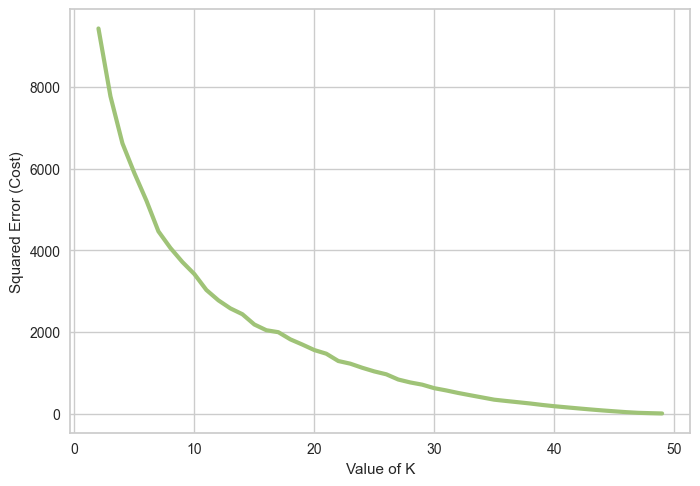

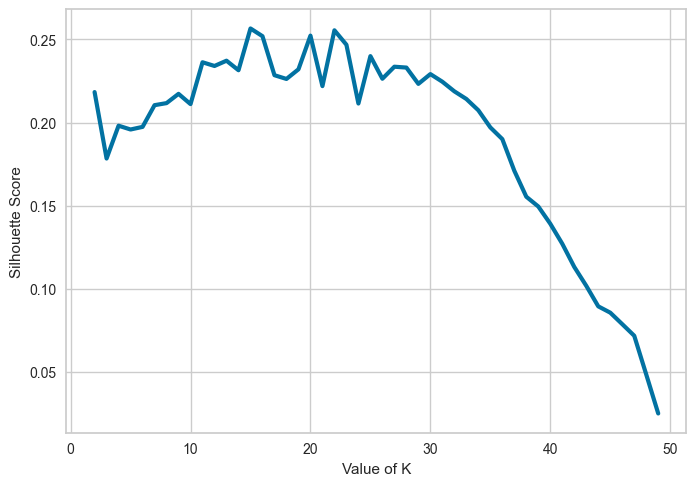

In [102]:

cost =[]
silhouette = []
#fig, ax = plt.subplots(3,2, figsize = (10,10))
#x = 0
#y = 0 
for i in range(2, 50):
    kmeans = KMeans(n_clusters = i, max_iter = 500, random_state = 0)
    kmeans.fit_predict(lifesnaps_personality)
    # Calculate Silhoutte Score
    score = silhouette_score(lifesnaps_personality, kmeans.labels_, metric='euclidean')
    silhouette.append(score)
    #print('Silhouetter Score: %.3f' % score)

    # calculates squared error
    # for the clustered points
    cost.append(kmeans.inertia_)    
    #q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    #visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax = ax[x%3][y%2])#ax[q-1][mod])
    #visualizer.fit(swell_only_personality)
    #x = x+1;
    #y = y+1;
    
 
# plot the cost against K values
plt.plot(range(2, 50), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot


plt.plot(range(2, 50), silhouette, color ='b', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show() # clear the plot
# the point of the elbow is the
# most optimal value for choosing k

In [193]:
kmeans = KMeans(n_clusters = 8, max_iter = 500, random_state = 0)
y = kmeans.fit_predict(lifesnaps_personality)

y = pd.DataFrame(y, columns=["Cluster"])
y.value_counts()

Cluster
3          9
7          9
6          7
0          6
1          6
4          6
5          5
2          2
dtype: int64

In [194]:
clusters = pd.concat([ids, y], axis=1)
clusters

,user_id,Cluster
0,621e2e8e67b776a24055b564,5
1,621e2eaf67b776a2406b14ac,6
2,621e2ed667b776a24085d8d1,0
3,621e2f3967b776a240c654db,7
4,621e2f6167b776a240e082a9,0
5,621e2f7a67b776a240f14425,5
6,621e2f9167b776a240011ccb,6
7,621e2fb367b776a24015accd,3
8,621e2fce67b776a240279baa,3
9,621e2ff067b776a2403eb737,6


In [195]:
clusters.rename(columns={"user_id": "id"}, inplace=True)

In [196]:
lifesnaps = pd.read_csv("Final_CSVs/lifesnaps_new.csv")

In [197]:
lifesnaps["id"].value_counts()

621e346f67b776a24081744f    244
621e367e67b776a24087d75d    244
621e301e67b776a240608a72    244
621e2f1b67b776a240b3d87c    236
621e342e67b776a2404ce460    223
                           ... 
621e34f767b776a240de4e1a     66
621e339967b776a240e502de     66
621e2fce67b776a240279baa     64
621e32af67b776a24045b4cf     64
621e301367b776a24057738e     64
Name: id, Length: 71, dtype: int64

In [143]:
#test = lifesnaps.join(clusters.set_index('id'), on='id')

In [198]:
test2 = pd.merge(lifesnaps, clusters, on = "id")

In [199]:
test2[["id", "Cluster"]]

,id,Cluster
0,621e329067b776a2402ffad2,3
1,621e329067b776a2402ffad2,3
2,621e329067b776a2402ffad2,3
3,621e329067b776a2402ffad2,3
4,621e329067b776a2402ffad2,3
...,...,...
5141,621e301367b776a24057738e,7
5142,621e301367b776a24057738e,7
5143,621e301367b776a24057738e,7
5144,621e301367b776a24057738e,7


In [183]:
test2.columns

Index(['ENTERTAINMENT', 'GYM', 'HOME', 'HOME1OFFICE', 'OTHER', 'OUTDOORS',
       'TRANSIT', 'WORK/SCHOOL', 'age', 'bmi', 'bpm', 'calories',
       'daily1temperature1variation', 'day', 'day1cos', 'day1sin', 'distance',
       'filteredDemographicVO2Max', 'full1sleep1breathing1rate', 'gender',
       'id', 'lightly1active1minutes', 'max1goal', 'min1goal',
       'mindfulness1session', 'minutesAfterWakeup', 'minutesAsleep',
       'minutesAwake', 'minutesToFallAsleep', 'minutes1below1default1zone11',
       'minutes1in1default1zone11', 'minutes1in1default1zone12',
       'minutes1in1default1zone13', 'moderately1active1minutes', 'month',
       'month1cos', 'month1sin', 'nightly1temperature', 'nremhr', 'resting1hr',
       'rmssd', 'scl1avg', 'sedentary1minutes', 'sleep1deep1ratio',
       'sleep1duration', 'sleep1efficiency', 'sleep1light1ratio',
       'sleep1rem1ratio', 'sleep1wake1ratio', 'spo2', 'step1goal',
       'step1goal1label', 'steps', 'very1active1minutes', 'week', 'week1cos

In [200]:
test2.to_csv("Final_CSVs/lifesnaps_personality_groups8.csv", index = False)

In [201]:
test2 = test2.drop('dataset', axis = 1)
#test2 = test2.drop('id', axis = 1)
test2

,ENTERTAINMENT,GYM,HOME,HOME1OFFICE,OTHER,OUTDOORS,TRANSIT,WORK/SCHOOL,age,bmi,...,very1active1minutes,week,week1cos,week1sin,weekday,weekday1cos,weekday1sin,year,stress,Cluster
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,20.0,22,-0.988831,-0.149042,4,-0.900969,-0.433884,2021,1,3
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,23.0,...,64.0,29,-0.365341,-0.930874,1,0.623490,0.781831,2021,0,3
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,23.0,...,76.0,24,-0.900969,-0.433884,1,0.623490,0.781831,2021,0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,23.0,...,90.0,27,-0.623490,-0.781831,0,1.000000,0.000000,2021,0,3
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,23.0,...,29.0,25,-0.826239,-0.563320,4,-0.900969,-0.433884,2021,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,35.0,27,-0.623490,-0.781831,6,0.623490,-0.781831,2021,0,7
5142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,0.0,25,-0.826239,-0.563320,1,0.623490,0.781831,2021,0,7
5143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,42.0,28,-0.500000,-0.866025,4,-0.900969,-0.433884,2021,0,7
5144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,...,58.0,28,-0.500000,-0.866025,3,-0.900969,0.433884,2021,0,7


In [202]:
unique_participants = test2["Cluster"].unique()
personality_group = test2.groupby('Cluster')

In [203]:
accuracies = []
precision = []
recall = []
f1scores = []

for participant in unique_participants:
    print("Participant: ",participant)
    part_df = personality_group.get_group(participant)
    grid = setup(data=part_df, target='stress', fix_imbalance = True, html=False, silent=True, verbose=False) #fix_imbalance = True,
    best = compare_models(sort="F1")
    accuracies.append(pull()['Accuracy'][0])
    precision.append(pull()['Prec.'][0])
    recall.append(pull()['Recall'][0])
    f1scores.append(pull()['F1'][0])
    print(best)

Participant:  3


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015
svm,SVM - Linear Kernel,0.4967,0.0000,0.5000,0.0659,0.1165,0.0000,0.0000,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015
svm,SVM - Linear Kernel,0.4967,0.0000,0.5000,0.0659,0.1165,0.0000,0.0000,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
rf,Random Forest Classifier,0.8786,0.9099,0.5306,0.5635,0.5300,0.4625,0.4715,0.057
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015
svm,SVM - Linear Kernel,0.4967,0.0000,0.5000,0.0659,0.1165,0.0000,0.0000,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
rf,Random Forest Classifier,0.8786,0.9099,0.5306,0.5635,0.5300,0.4625,0.4715,0.057
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015
qda,Quadratic Discriminant Analysis,0.8617,0.5316,0.0792,0.3833,0.1294,0.0938,0.1286,0.010
svm,SVM - Linear Kernel,0.4967,0.0000,0.5000,0.0659,0.1165,0.0000,0.0000,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
rf,Random Forest Classifier,0.8786,0.9099,0.5306,0.5635,0.5300,0.4625,0.4715,0.057
ada,Ada Boost Classifier,0.8602,0.8888,0.5542,0.4966,0.5055,0.4266,0.4380,0.041
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015
qda,Quadratic Discriminant Analysis,0.8617,0.5316,0.0792,0.3833,0.1294,0.0938,0.1286,0.010
svm,SVM - Linear Kernel,0.4967,0.0000,0.5000,0.0659,0.1165,0.0000,0.0000,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
rf,Random Forest Classifier,0.8786,0.9099,0.5306,0.5635,0.5300,0.4625,0.4715,0.057
gbc,Gradient Boosting Classifier,0.8617,0.9025,0.5667,0.5000,0.5169,0.4387,0.4481,0.106
ada,Ada Boost Classifier,0.8602,0.8888,0.5542,0.4966,0.5055,0.4266,0.4380,0.041
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015
qda,Quadratic Discriminant Analysis,0.8617,0.5316,0.0792,0.3833,0.1294,0.0938,0.1286,0.010
svm,SVM - Linear Kernel,0.4967,0.0000,0.5000,0.0659,0.1165,0.0000,0.0000,0.018


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
rf,Random Forest Classifier,0.8786,0.9099,0.5306,0.5635,0.5300,0.4625,0.4715,0.057
lda,Linear Discriminant Analysis,0.8280,0.8657,0.6917,0.4273,0.5210,0.4252,0.4482,0.012
gbc,Gradient Boosting Classifier,0.8617,0.9025,0.5667,0.5000,0.5169,0.4387,0.4481,0.106
ada,Ada Boost Classifier,0.8602,0.8888,0.5542,0.4966,0.5055,0.4266,0.4380,0.041
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015
qda,Quadratic Discriminant Analysis,0.8617,0.5316,0.0792,0.3833,0.1294,0.0938,0.1286,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8894,0.9068,0.5319,0.6056,0.5594,0.4972,0.5023,0.055
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
rf,Random Forest Classifier,0.8786,0.9099,0.5306,0.5635,0.5300,0.4625,0.4715,0.057
lda,Linear Discriminant Analysis,0.8280,0.8657,0.6917,0.4273,0.5210,0.4252,0.4482,0.012
gbc,Gradient Boosting Classifier,0.8617,0.9025,0.5667,0.5000,0.5169,0.4387,0.4481,0.106
ada,Ada Boost Classifier,0.8602,0.8888,0.5542,0.4966,0.5055,0.4266,0.4380,0.041
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008
knn,K Neighbors Classifier,0.7312,0.7606,0.6208,0.2800,0.3847,0.2435,0.2756,0.015


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8894,0.9068,0.5319,0.6056,0.5594,0.4972,0.5023,0.055
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
rf,Random Forest Classifier,0.8786,0.9099,0.5306,0.5635,0.5300,0.4625,0.4715,0.057
lda,Linear Discriminant Analysis,0.8280,0.8657,0.6917,0.4273,0.5210,0.4252,0.4482,0.012
gbc,Gradient Boosting Classifier,0.8617,0.9025,0.5667,0.5000,0.5169,0.4387,0.4481,0.106
lightgbm,Light Gradient Boosting Machine,0.8710,0.9076,0.5097,0.5389,0.5131,0.4402,0.4465,0.101
ada,Ada Boost Classifier,0.8602,0.8888,0.5542,0.4966,0.5055,0.4266,0.4380,0.041
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8894,0.9068,0.5319,0.6056,0.5594,0.4972,0.5023,0.055
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
rf,Random Forest Classifier,0.8786,0.9099,0.5306,0.5635,0.5300,0.4625,0.4715,0.057
lda,Linear Discriminant Analysis,0.8280,0.8657,0.6917,0.4273,0.5210,0.4252,0.4482,0.012
gbc,Gradient Boosting Classifier,0.8617,0.9025,0.5667,0.5000,0.5169,0.4387,0.4481,0.106
lightgbm,Light Gradient Boosting Machine,0.8710,0.9076,0.5097,0.5389,0.5131,0.4402,0.4465,0.101
ada,Ada Boost Classifier,0.8602,0.8888,0.5542,0.4966,0.5055,0.4266,0.4380,0.041
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8894,0.9068,0.5319,0.6056,0.5594,0.4972,0.5023,0.055
ridge,Ridge Classifier,0.8295,0.0000,0.7250,0.4274,0.5342,0.4392,0.4646,0.008
rf,Random Forest Classifier,0.8786,0.9099,0.5306,0.5635,0.5300,0.4625,0.4715,0.057
lda,Linear Discriminant Analysis,0.8280,0.8657,0.6917,0.4273,0.5210,0.4252,0.4482,0.012
gbc,Gradient Boosting Classifier,0.8617,0.9025,0.5667,0.5000,0.5169,0.4387,0.4481,0.106
lightgbm,Light Gradient Boosting Machine,0.8710,0.9076,0.5097,0.5389,0.5131,0.4402,0.4465,0.101
ada,Ada Boost Classifier,0.8602,0.8888,0.5542,0.4966,0.5055,0.4266,0.4380,0.041
dt,Decision Tree Classifier,0.8603,0.7183,0.5236,0.4915,0.5028,0.4224,0.4250,0.019
lr,Logistic Regression,0.7313,0.8491,0.8639,0.3234,0.4686,0.3376,0.4113,0.016
nb,Naive Bayes,0.7266,0.8004,0.8750,0.3210,0.4675,0.3355,0.4121,0.008


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=4452, verbose=0,
                     warm_start=False)
Participant:  0


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0538,0.1014,0.0000,0.0000,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0538,0.1014,0.0000,0.0000,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9339,0.9467,0.5333,0.4983,0.4729,0.4396,0.4617,0.043
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0538,0.1014,0.0000,0.0000,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9339,0.9467,0.5333,0.4983,0.4729,0.4396,0.4617,0.043
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0538,0.1014,0.0000,0.0000,0.009
qda,Quadratic Discriminant Analysis,0.9339,0.4967,0.0000,0.0000,0.0000,-0.0084,-0.0091,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9339,0.9467,0.5333,0.4983,0.4729,0.4396,0.4617,0.043
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
ada,Ada Boost Classifier,0.9257,0.8822,0.4333,0.4050,0.3768,0.3429,0.3644,0.045
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0538,0.1014,0.0000,0.0000,0.009
qda,Quadratic Discriminant Analysis,0.9339,0.4967,0.0000,0.0000,0.0000,-0.0084,-0.0091,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9381,0.9347,0.5667,0.5817,0.5202,0.4896,0.5167,0.092
rf,Random Forest Classifier,0.9339,0.9467,0.5333,0.4983,0.4729,0.4396,0.4617,0.043
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
ada,Ada Boost Classifier,0.9257,0.8822,0.4333,0.4050,0.3768,0.3429,0.3644,0.045
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0538,0.1014,0.0000,0.0000,0.009
qda,Quadratic Discriminant Analysis,0.9339,0.4967,0.0000,0.0000,0.0000,-0.0084,-0.0091,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9381,0.9347,0.5667,0.5817,0.5202,0.4896,0.5167,0.092
rf,Random Forest Classifier,0.9339,0.9467,0.5333,0.4983,0.4729,0.4396,0.4617,0.043
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
ada,Ada Boost Classifier,0.9257,0.8822,0.4333,0.4050,0.3768,0.3429,0.3644,0.045
lda,Linear Discriminant Analysis,0.8614,0.8930,0.6667,0.2588,0.3663,0.3071,0.3532,0.011
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007
svm,SVM - Linear Kernel,0.1477,0.0000,0.9000,0.0538,0.1014,0.0000,0.0000,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9381,0.9347,0.5667,0.5817,0.5202,0.4896,0.5167,0.092
et,Extra Trees Classifier,0.9382,0.9544,0.5333,0.5750,0.5102,0.4791,0.5009,0.038
rf,Random Forest Classifier,0.9339,0.9467,0.5333,0.4983,0.4729,0.4396,0.4617,0.043
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
ada,Ada Boost Classifier,0.9257,0.8822,0.4333,0.4050,0.3768,0.3429,0.3644,0.045
lda,Linear Discriminant Analysis,0.8614,0.8930,0.6667,0.2588,0.3663,0.3071,0.3532,0.011
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008
nb,Naive Bayes,0.3531,0.5130,0.7333,0.0637,0.1168,0.0080,0.0371,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9381,0.9347,0.5667,0.5817,0.5202,0.4896,0.5167,0.092
et,Extra Trees Classifier,0.9382,0.9544,0.5333,0.5750,0.5102,0.4791,0.5009,0.038
rf,Random Forest Classifier,0.9339,0.9467,0.5333,0.4983,0.4729,0.4396,0.4617,0.043
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
ada,Ada Boost Classifier,0.9257,0.8822,0.4333,0.4050,0.3768,0.3429,0.3644,0.045
lda,Linear Discriminant Analysis,0.8614,0.8930,0.6667,0.2588,0.3663,0.3071,0.3532,0.011
lightgbm,Light Gradient Boosting Machine,0.9196,0.9273,0.2833,0.3283,0.2840,0.2470,0.2570,0.089
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9381,0.9347,0.5667,0.5817,0.5202,0.4896,0.5167,0.092
et,Extra Trees Classifier,0.9382,0.9544,0.5333,0.5750,0.5102,0.4791,0.5009,0.038
rf,Random Forest Classifier,0.9339,0.9467,0.5333,0.4983,0.4729,0.4396,0.4617,0.043
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
ada,Ada Boost Classifier,0.9257,0.8822,0.4333,0.4050,0.3768,0.3429,0.3644,0.045
lda,Linear Discriminant Analysis,0.8614,0.8930,0.6667,0.2588,0.3663,0.3071,0.3532,0.011
lightgbm,Light Gradient Boosting Machine,0.9196,0.9273,0.2833,0.3283,0.2840,0.2470,0.2570,0.089
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9381,0.9347,0.5667,0.5817,0.5202,0.4896,0.5167,0.092
et,Extra Trees Classifier,0.9382,0.9544,0.5333,0.5750,0.5102,0.4791,0.5009,0.038
rf,Random Forest Classifier,0.9339,0.9467,0.5333,0.4983,0.4729,0.4396,0.4617,0.043
dt,Decision Tree Classifier,0.9236,0.7103,0.4667,0.4933,0.4205,0.3830,0.4126,0.009
ridge,Ridge Classifier,0.8677,0.0000,0.7333,0.2806,0.3952,0.3393,0.3946,0.018
ada,Ada Boost Classifier,0.9257,0.8822,0.4333,0.4050,0.3768,0.3429,0.3644,0.045
lda,Linear Discriminant Analysis,0.8614,0.8930,0.6667,0.2588,0.3663,0.3071,0.3532,0.011
lightgbm,Light Gradient Boosting Machine,0.9196,0.9273,0.2833,0.3283,0.2840,0.2470,0.2570,0.089
knn,K Neighbors Classifier,0.6963,0.5750,0.5000,0.0968,0.1603,0.0678,0.1050,0.019
lr,Logistic Regression,0.3537,0.4886,0.7667,0.0654,0.1189,0.0229,0.0494,0.008


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1679, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Participant:  7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.01


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010
svm,SVM - Linear Kernel,0.6536,0.0000,0.3000,0.0336,0.0605,0.0000,0.0000,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010
svm,SVM - Linear Kernel,0.6536,0.0000,0.3000,0.0336,0.0605,0.0000,0.0000,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9386,0.9622,0.7889,0.7275,0.7458,0.7113,0.7189,0.062
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010
svm,SVM - Linear Kernel,0.6536,0.0000,0.3000,0.0336,0.0605,0.0000,0.0000,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9386,0.9622,0.7889,0.7275,0.7458,0.7113,0.7189,0.062
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010
qda,Quadratic Discriminant Analysis,0.8851,0.5486,0.1139,0.2879,0.1371,0.1116,0.1334,0.012
svm,SVM - Linear Kernel,0.6536,0.0000,0.3000,0.0336,0.0605,0.0000,0.0000,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9386,0.9622,0.7889,0.7275,0.7458,0.7113,0.7189,0.062
ada,Ada Boost Classifier,0.9212,0.9600,0.6958,0.6797,0.6586,0.6160,0.6306,0.051
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010
qda,Quadratic Discriminant Analysis,0.8851,0.5486,0.1139,0.2879,0.1371,0.1116,0.1334,0.012
svm,SVM - Linear Kernel,0.6536,0.0000,0.3000,0.0336,0.0605,0.0000,0.0000,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9399,0.9661,0.7806,0.7327,0.7511,0.7173,0.7206,0.127
rf,Random Forest Classifier,0.9386,0.9622,0.7889,0.7275,0.7458,0.7113,0.7189,0.062
ada,Ada Boost Classifier,0.9212,0.9600,0.6958,0.6797,0.6586,0.6160,0.6306,0.051
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010
qda,Quadratic Discriminant Analysis,0.8851,0.5486,0.1139,0.2879,0.1371,0.1116,0.1334,0.012
svm,SVM - Linear Kernel,0.6536,0.0000,0.3000,0.0336,0.0605,0.0000,0.0000,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9399,0.9661,0.7806,0.7327,0.7511,0.7173,0.7206,0.127
rf,Random Forest Classifier,0.9386,0.9622,0.7889,0.7275,0.7458,0.7113,0.7189,0.062
ada,Ada Boost Classifier,0.9212,0.9600,0.6958,0.6797,0.6586,0.6160,0.6306,0.051
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
lda,Linear Discriminant Analysis,0.8797,0.9282,0.8361,0.4882,0.6136,0.5486,0.5784,0.017
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010
qda,Quadratic Discriminant Analysis,0.8851,0.5486,0.1139,0.2879,0.1371,0.1116,0.1334,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9399,0.9661,0.7806,0.7327,0.7511,0.7173,0.7206,0.127
rf,Random Forest Classifier,0.9386,0.9622,0.7889,0.7275,0.7458,0.7113,0.7189,0.062
et,Extra Trees Classifier,0.9359,0.9634,0.8014,0.7043,0.7434,0.7072,0.7131,0.049
ada,Ada Boost Classifier,0.9212,0.9600,0.6958,0.6797,0.6586,0.6160,0.6306,0.051
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
lda,Linear Discriminant Analysis,0.8797,0.9282,0.8361,0.4882,0.6136,0.5486,0.5784,0.017
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016
lr,Logistic Regression,0.4616,0.6314,0.7708,0.1702,0.2676,0.1024,0.1295,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9399,0.9661,0.7806,0.7327,0.7511,0.7173,0.7206,0.127
rf,Random Forest Classifier,0.9386,0.9622,0.7889,0.7275,0.7458,0.7113,0.7189,0.062
et,Extra Trees Classifier,0.9359,0.9634,0.8014,0.7043,0.7434,0.7072,0.7131,0.049
lightgbm,Light Gradient Boosting Machine,0.9252,0.9601,0.7069,0.6883,0.6796,0.6383,0.6479,0.106
ada,Ada Boost Classifier,0.9212,0.9600,0.6958,0.6797,0.6586,0.6160,0.6306,0.051
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
lda,Linear Discriminant Analysis,0.8797,0.9282,0.8361,0.4882,0.6136,0.5486,0.5784,0.017
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9399,0.9661,0.7806,0.7327,0.7511,0.7173,0.7206,0.127
rf,Random Forest Classifier,0.9386,0.9622,0.7889,0.7275,0.7458,0.7113,0.7189,0.062
et,Extra Trees Classifier,0.9359,0.9634,0.8014,0.7043,0.7434,0.7072,0.7131,0.049
lightgbm,Light Gradient Boosting Machine,0.9252,0.9601,0.7069,0.6883,0.6796,0.6383,0.6479,0.106
ada,Ada Boost Classifier,0.9212,0.9600,0.6958,0.6797,0.6586,0.6160,0.6306,0.051
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
lda,Linear Discriminant Analysis,0.8797,0.9282,0.8361,0.4882,0.6136,0.5486,0.5784,0.017
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9399,0.9661,0.7806,0.7327,0.7511,0.7173,0.7206,0.127
rf,Random Forest Classifier,0.9386,0.9622,0.7889,0.7275,0.7458,0.7113,0.7189,0.062
et,Extra Trees Classifier,0.9359,0.9634,0.8014,0.7043,0.7434,0.7072,0.7131,0.049
lightgbm,Light Gradient Boosting Machine,0.9252,0.9601,0.7069,0.6883,0.6796,0.6383,0.6479,0.106
ada,Ada Boost Classifier,0.9212,0.9600,0.6958,0.6797,0.6586,0.6160,0.6306,0.051
ridge,Ridge Classifier,0.8904,0.0000,0.8486,0.5216,0.6420,0.5823,0.6089,0.010
dt,Decision Tree Classifier,0.9146,0.7987,0.6486,0.6604,0.6418,0.5943,0.6016,0.013
lda,Linear Discriminant Analysis,0.8797,0.9282,0.8361,0.4882,0.6136,0.5486,0.5784,0.017
nb,Naive Bayes,0.6417,0.7349,0.7861,0.2126,0.3341,0.1891,0.2644,0.017
knn,K Neighbors Classifier,0.6779,0.6848,0.5625,0.1917,0.2846,0.1394,0.1728,0.016


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=372, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Participant:  1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7089,0.6277,0.0,0.0,0.0,0.0,0.0,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.098,0.011
lr,Logistic Regression,0.7089,0.6277,0.0000,0.0000,0.0000,0.0000,0.000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011
lr,Logistic Regression,0.7089,0.6277,0.0000,0.0000,0.0000,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011
lr,Logistic Regression,0.7089,0.6277,0.0000,0.0000,0.0000,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011
svm,SVM - Linear Kernel,0.4551,0.0000,0.6000,0.1731,0.2687,0.0000,0.0000,0.008
lr,Logistic Regression,0.7089,0.6277,0.0000,0.0000,0.0000,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011
svm,SVM - Linear Kernel,0.4551,0.0000,0.6000,0.1731,0.2687,0.0000,0.0000,0.008
lr,Logistic Regression,0.7089,0.6277,0.0000,0.0000,0.0000,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8876,0.9481,0.8418,0.8001,0.8122,0.7327,0.7406,0.048
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011
svm,SVM - Linear Kernel,0.4551,0.0000,0.6000,0.1731,0.2687,0.0000,0.0000,0.008
lr,Logistic Regression,0.7089,0.6277,0.0000,0.0000,0.0000,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8876,0.9481,0.8418,0.8001,0.8122,0.7327,0.7406,0.048
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
qda,Quadratic Discriminant Analysis,0.8154,0.8204,0.6727,0.6905,0.6756,0.5473,0.5522,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011
svm,SVM - Linear Kernel,0.4551,0.0000,0.6000,0.1731,0.2687,0.0000,0.0000,0.008
lr,Logistic Regression,0.7089,0.6277,0.0000,0.0000,0.0000,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8876,0.9481,0.8418,0.8001,0.8122,0.7327,0.7406,0.048
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
ada,Ada Boost Classifier,0.8387,0.9015,0.7445,0.7259,0.7277,0.6137,0.6207,0.030
qda,Quadratic Discriminant Analysis,0.8154,0.8204,0.6727,0.6905,0.6756,0.5473,0.5522,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011
svm,SVM - Linear Kernel,0.4551,0.0000,0.6000,0.1731,0.2687,0.0000,0.0000,0.008
lr,Logistic Regression,0.7089,0.6277,0.0000,0.0000,0.0000,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8876,0.9481,0.8418,0.8001,0.8122,0.7327,0.7406,0.048
gbc,Gradient Boosting Classifier,0.8821,0.9390,0.8218,0.7920,0.7999,0.7169,0.7231,0.053
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
ada,Ada Boost Classifier,0.8387,0.9015,0.7445,0.7259,0.7277,0.6137,0.6207,0.030
qda,Quadratic Discriminant Analysis,0.8154,0.8204,0.6727,0.6905,0.6756,0.5473,0.5522,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011
svm,SVM - Linear Kernel,0.4551,0.0000,0.6000,0.1731,0.2687,0.0000,0.0000,0.008
lr,Logistic Regression,0.7089,0.6277,0.0000,0.0000,0.0000,0.0000,0.0000,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8876,0.9481,0.8418,0.8001,0.8122,0.7327,0.7406,0.048
gbc,Gradient Boosting Classifier,0.8821,0.9390,0.8218,0.7920,0.7999,0.7169,0.7231,0.053
lda,Linear Discriminant Analysis,0.8387,0.9080,0.8627,0.6887,0.7608,0.6426,0.6569,0.009
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
ada,Ada Boost Classifier,0.8387,0.9015,0.7445,0.7259,0.7277,0.6137,0.6207,0.030
qda,Quadratic Discriminant Analysis,0.8154,0.8204,0.6727,0.6905,0.6756,0.5473,0.5522,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011
svm,SVM - Linear Kernel,0.4551,0.0000,0.6000,0.1731,0.2687,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8881,0.9504,0.8336,0.8028,0.8123,0.7329,0.7381,0.041
rf,Random Forest Classifier,0.8876,0.9481,0.8418,0.8001,0.8122,0.7327,0.7406,0.048
gbc,Gradient Boosting Classifier,0.8821,0.9390,0.8218,0.7920,0.7999,0.7169,0.7231,0.053
lda,Linear Discriminant Analysis,0.8387,0.9080,0.8627,0.6887,0.7608,0.6426,0.6569,0.009
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
ada,Ada Boost Classifier,0.8387,0.9015,0.7445,0.7259,0.7277,0.6137,0.6207,0.030
qda,Quadratic Discriminant Analysis,0.8154,0.8204,0.6727,0.6905,0.6756,0.5473,0.5522,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007
knn,K Neighbors Classifier,0.5884,0.6033,0.4673,0.3483,0.3958,0.0955,0.0980,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8881,0.9504,0.8336,0.8028,0.8123,0.7329,0.7381,0.041
rf,Random Forest Classifier,0.8876,0.9481,0.8418,0.8001,0.8122,0.7327,0.7406,0.048
gbc,Gradient Boosting Classifier,0.8821,0.9390,0.8218,0.7920,0.7999,0.7169,0.7231,0.053
lightgbm,Light Gradient Boosting Machine,0.8734,0.9401,0.8118,0.7751,0.7873,0.6977,0.7034,0.028
lda,Linear Discriminant Analysis,0.8387,0.9080,0.8627,0.6887,0.7608,0.6426,0.6569,0.009
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
ada,Ada Boost Classifier,0.8387,0.9015,0.7445,0.7259,0.7277,0.6137,0.6207,0.030
qda,Quadratic Discriminant Analysis,0.8154,0.8204,0.6727,0.6905,0.6756,0.5473,0.5522,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8881,0.9504,0.8336,0.8028,0.8123,0.7329,0.7381,0.041
rf,Random Forest Classifier,0.8876,0.9481,0.8418,0.8001,0.8122,0.7327,0.7406,0.048
gbc,Gradient Boosting Classifier,0.8821,0.9390,0.8218,0.7920,0.7999,0.7169,0.7231,0.053
lightgbm,Light Gradient Boosting Machine,0.8734,0.9401,0.8118,0.7751,0.7873,0.6977,0.7034,0.028
lda,Linear Discriminant Analysis,0.8387,0.9080,0.8627,0.6887,0.7608,0.6426,0.6569,0.009
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
ada,Ada Boost Classifier,0.8387,0.9015,0.7445,0.7259,0.7277,0.6137,0.6207,0.030
qda,Quadratic Discriminant Analysis,0.8154,0.8204,0.6727,0.6905,0.6756,0.5473,0.5522,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8881,0.9504,0.8336,0.8028,0.8123,0.7329,0.7381,0.041
rf,Random Forest Classifier,0.8876,0.9481,0.8418,0.8001,0.8122,0.7327,0.7406,0.048
gbc,Gradient Boosting Classifier,0.8821,0.9390,0.8218,0.7920,0.7999,0.7169,0.7231,0.053
lightgbm,Light Gradient Boosting Machine,0.8734,0.9401,0.8118,0.7751,0.7873,0.6977,0.7034,0.028
lda,Linear Discriminant Analysis,0.8387,0.9080,0.8627,0.6887,0.7608,0.6426,0.6569,0.009
dt,Decision Tree Classifier,0.8563,0.8419,0.8100,0.7337,0.7606,0.6592,0.6701,0.008
ridge,Ridge Classifier,0.8416,0.0000,0.8327,0.7006,0.7563,0.6411,0.6508,0.008
ada,Ada Boost Classifier,0.8387,0.9015,0.7445,0.7259,0.7277,0.6137,0.6207,0.030
qda,Quadratic Discriminant Analysis,0.8154,0.8204,0.6727,0.6905,0.6756,0.5473,0.5522,0.008
nb,Naive Bayes,0.5590,0.6547,0.7527,0.3772,0.5008,0.1812,0.2126,0.007


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1635, verbose=0,
                     warm_start=False)
Participant:  5


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7159,0.71,0.5768,0.4704,0.4987,0.3097,0.3237,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011
svm,SVM - Linear Kernel,0.4474,0.0000,0.6000,0.1500,0.2400,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011
svm,SVM - Linear Kernel,0.4474,0.0000,0.6000,0.1500,0.2400,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8648,0.9139,0.7196,0.7518,0.7292,0.6397,0.6448,0.040
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011
svm,SVM - Linear Kernel,0.4474,0.0000,0.6000,0.1500,0.2400,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8648,0.9139,0.7196,0.7518,0.7292,0.6397,0.6448,0.040
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011
svm,SVM - Linear Kernel,0.4474,0.0000,0.6000,0.1500,0.2400,0.0000,0.0000,0.008
qda,Quadratic Discriminant Analysis,0.7511,0.5310,0.0857,0.4000,0.1389,0.0835,0.1191,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8648,0.9139,0.7196,0.7518,0.7292,0.6397,0.6448,0.040
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
ada,Ada Boost Classifier,0.8148,0.8857,0.6036,0.6684,0.6136,0.4949,0.5097,0.027
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011
svm,SVM - Linear Kernel,0.4474,0.0000,0.6000,0.1500,0.2400,0.0000,0.0000,0.008
qda,Quadratic Discriminant Analysis,0.7511,0.5310,0.0857,0.4000,0.1389,0.0835,0.1191,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8648,0.9139,0.7196,0.7518,0.7292,0.6397,0.6448,0.040
gbc,Gradient Boosting Classifier,0.8287,0.8966,0.6446,0.6849,0.6504,0.5397,0.5494,0.046
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
ada,Ada Boost Classifier,0.8148,0.8857,0.6036,0.6684,0.6136,0.4949,0.5097,0.027
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011
svm,SVM - Linear Kernel,0.4474,0.0000,0.6000,0.1500,0.2400,0.0000,0.0000,0.008
qda,Quadratic Discriminant Analysis,0.7511,0.5310,0.0857,0.4000,0.1389,0.0835,0.1191,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8648,0.9139,0.7196,0.7518,0.7292,0.6397,0.6448,0.040
gbc,Gradient Boosting Classifier,0.8287,0.8966,0.6446,0.6849,0.6504,0.5397,0.5494,0.046
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
ada,Ada Boost Classifier,0.8148,0.8857,0.6036,0.6684,0.6136,0.4949,0.5097,0.027
lda,Linear Discriminant Analysis,0.7865,0.8153,0.6482,0.5731,0.6037,0.4594,0.4646,0.008
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011
svm,SVM - Linear Kernel,0.4474,0.0000,0.6000,0.1500,0.2400,0.0000,0.0000,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8648,0.9139,0.7196,0.7518,0.7292,0.6397,0.6448,0.040
et,Extra Trees Classifier,0.8683,0.9224,0.6786,0.8022,0.7224,0.6382,0.6507,0.036
gbc,Gradient Boosting Classifier,0.8287,0.8966,0.6446,0.6849,0.6504,0.5397,0.5494,0.046
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
ada,Ada Boost Classifier,0.8148,0.8857,0.6036,0.6684,0.6136,0.4949,0.5097,0.027
lda,Linear Discriminant Analysis,0.7865,0.8153,0.6482,0.5731,0.6037,0.4594,0.4646,0.008
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007
knn,K Neighbors Classifier,0.6835,0.6605,0.5768,0.4092,0.4720,0.2572,0.2695,0.011


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8648,0.9139,0.7196,0.7518,0.7292,0.6397,0.6448,0.040
et,Extra Trees Classifier,0.8683,0.9224,0.6786,0.8022,0.7224,0.6382,0.6507,0.036
lightgbm,Light Gradient Boosting Machine,0.8466,0.9177,0.6589,0.7168,0.6827,0.5824,0.5859,0.017
gbc,Gradient Boosting Classifier,0.8287,0.8966,0.6446,0.6849,0.6504,0.5397,0.5494,0.046
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
ada,Ada Boost Classifier,0.8148,0.8857,0.6036,0.6684,0.6136,0.4949,0.5097,0.027
lda,Linear Discriminant Analysis,0.7865,0.8153,0.6482,0.5731,0.6037,0.4594,0.4646,0.008
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8648,0.9139,0.7196,0.7518,0.7292,0.6397,0.6448,0.040
et,Extra Trees Classifier,0.8683,0.9224,0.6786,0.8022,0.7224,0.6382,0.6507,0.036
lightgbm,Light Gradient Boosting Machine,0.8466,0.9177,0.6589,0.7168,0.6827,0.5824,0.5859,0.017
gbc,Gradient Boosting Classifier,0.8287,0.8966,0.6446,0.6849,0.6504,0.5397,0.5494,0.046
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
ada,Ada Boost Classifier,0.8148,0.8857,0.6036,0.6684,0.6136,0.4949,0.5097,0.027
lda,Linear Discriminant Analysis,0.7865,0.8153,0.6482,0.5731,0.6037,0.4594,0.4646,0.008
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8648,0.9139,0.7196,0.7518,0.7292,0.6397,0.6448,0.040
et,Extra Trees Classifier,0.8683,0.9224,0.6786,0.8022,0.7224,0.6382,0.6507,0.036
lightgbm,Light Gradient Boosting Machine,0.8466,0.9177,0.6589,0.7168,0.6827,0.5824,0.5859,0.017
gbc,Gradient Boosting Classifier,0.8287,0.8966,0.6446,0.6849,0.6504,0.5397,0.5494,0.046
dt,Decision Tree Classifier,0.8220,0.7542,0.6179,0.6697,0.6295,0.5151,0.5238,0.008
ridge,Ridge Classifier,0.8007,0.0000,0.6625,0.6090,0.6250,0.4918,0.4999,0.007
ada,Ada Boost Classifier,0.8148,0.8857,0.6036,0.6684,0.6136,0.4949,0.5097,0.027
lda,Linear Discriminant Analysis,0.7865,0.8153,0.6482,0.5731,0.6037,0.4594,0.4646,0.008
nb,Naive Bayes,0.7086,0.7806,0.7464,0.4698,0.5683,0.3702,0.3983,0.006
lr,Logistic Regression,0.7159,0.7100,0.5768,0.4704,0.4987,0.3097,0.3237,0.007


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1344, verbose=0,
                       warm_start=False)
Participant:  6


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.741,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017
svm,SVM - Linear Kernel,0.4202,0.0000,0.6000,0.0629,0.1138,0.0000,0.0000,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017
svm,SVM - Linear Kernel,0.4202,0.0000,0.6000,0.0629,0.1138,0.0000,0.0000,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9234,0.9546,0.7000,0.6286,0.6528,0.6105,0.6173,0.065
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017
svm,SVM - Linear Kernel,0.4202,0.0000,0.6000,0.0629,0.1138,0.0000,0.0000,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9234,0.9546,0.7000,0.6286,0.6528,0.6105,0.6173,0.065
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017
svm,SVM - Linear Kernel,0.4202,0.0000,0.6000,0.0629,0.1138,0.0000,0.0000,0.010
qda,Quadratic Discriminant Analysis,0.8791,0.5187,0.0619,0.3000,0.1016,0.0624,0.0935,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9234,0.9546,0.7000,0.6286,0.6528,0.6105,0.6173,0.065
ada,Ada Boost Classifier,0.9132,0.9475,0.6167,0.6141,0.6036,0.5558,0.5627,0.049
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017
svm,SVM - Linear Kernel,0.4202,0.0000,0.6000,0.0629,0.1138,0.0000,0.0000,0.010
qda,Quadratic Discriminant Analysis,0.8791,0.5187,0.0619,0.3000,0.1016,0.0624,0.0935,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9200,0.9487,0.7286,0.6184,0.6635,0.6193,0.6250,0.102
rf,Random Forest Classifier,0.9234,0.9546,0.7000,0.6286,0.6528,0.6105,0.6173,0.065
ada,Ada Boost Classifier,0.9132,0.9475,0.6167,0.6141,0.6036,0.5558,0.5627,0.049
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017
svm,SVM - Linear Kernel,0.4202,0.0000,0.6000,0.0629,0.1138,0.0000,0.0000,0.010
qda,Quadratic Discriminant Analysis,0.8791,0.5187,0.0619,0.3000,0.1016,0.0624,0.0935,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9200,0.9487,0.7286,0.6184,0.6635,0.6193,0.6250,0.102
rf,Random Forest Classifier,0.9234,0.9546,0.7000,0.6286,0.6528,0.6105,0.6173,0.065
ada,Ada Boost Classifier,0.9132,0.9475,0.6167,0.6141,0.6036,0.5558,0.5627,0.049
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
lda,Linear Discriminant Analysis,0.8774,0.9365,0.7429,0.4615,0.5593,0.4939,0.5192,0.011
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017
svm,SVM - Linear Kernel,0.4202,0.0000,0.6000,0.0629,0.1138,0.0000,0.0000,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9217,0.9575,0.7571,0.6092,0.6702,0.6268,0.6346,0.057
gbc,Gradient Boosting Classifier,0.9200,0.9487,0.7286,0.6184,0.6635,0.6193,0.6250,0.102
rf,Random Forest Classifier,0.9234,0.9546,0.7000,0.6286,0.6528,0.6105,0.6173,0.065
ada,Ada Boost Classifier,0.9132,0.9475,0.6167,0.6141,0.6036,0.5558,0.5627,0.049
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
lda,Linear Discriminant Analysis,0.8774,0.9365,0.7429,0.4615,0.5593,0.4939,0.5192,0.011
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020
lr,Logistic Regression,0.7410,0.5963,0.4524,0.1504,0.2223,0.1161,0.1491,0.017


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9320,0.9543,0.6952,0.6840,0.6827,0.6450,0.6490,0.107
et,Extra Trees Classifier,0.9217,0.9575,0.7571,0.6092,0.6702,0.6268,0.6346,0.057
gbc,Gradient Boosting Classifier,0.9200,0.9487,0.7286,0.6184,0.6635,0.6193,0.6250,0.102
rf,Random Forest Classifier,0.9234,0.9546,0.7000,0.6286,0.6528,0.6105,0.6173,0.065
ada,Ada Boost Classifier,0.9132,0.9475,0.6167,0.6141,0.6036,0.5558,0.5627,0.049
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
lda,Linear Discriminant Analysis,0.8774,0.9365,0.7429,0.4615,0.5593,0.4939,0.5192,0.011
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9320,0.9543,0.6952,0.6840,0.6827,0.6450,0.6490,0.107
et,Extra Trees Classifier,0.9217,0.9575,0.7571,0.6092,0.6702,0.6268,0.6346,0.057
gbc,Gradient Boosting Classifier,0.9200,0.9487,0.7286,0.6184,0.6635,0.6193,0.6250,0.102
rf,Random Forest Classifier,0.9234,0.9546,0.7000,0.6286,0.6528,0.6105,0.6173,0.065
ada,Ada Boost Classifier,0.9132,0.9475,0.6167,0.6141,0.6036,0.5558,0.5627,0.049
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
lda,Linear Discriminant Analysis,0.8774,0.9365,0.7429,0.4615,0.5593,0.4939,0.5192,0.011
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9320,0.9543,0.6952,0.6840,0.6827,0.6450,0.6490,0.107
et,Extra Trees Classifier,0.9217,0.9575,0.7571,0.6092,0.6702,0.6268,0.6346,0.057
gbc,Gradient Boosting Classifier,0.9200,0.9487,0.7286,0.6184,0.6635,0.6193,0.6250,0.102
rf,Random Forest Classifier,0.9234,0.9546,0.7000,0.6286,0.6528,0.6105,0.6173,0.065
ada,Ada Boost Classifier,0.9132,0.9475,0.6167,0.6141,0.6036,0.5558,0.5627,0.049
ridge,Ridge Classifier,0.8841,0.0000,0.8071,0.4833,0.5985,0.5370,0.5648,0.016
lda,Linear Discriminant Analysis,0.8774,0.9365,0.7429,0.4615,0.5593,0.4939,0.5192,0.011
dt,Decision Tree Classifier,0.8893,0.7263,0.5190,0.5175,0.5068,0.4473,0.4526,0.011
nb,Naive Bayes,0.5606,0.7565,0.8238,0.1749,0.2875,0.1369,0.2194,0.008
knn,K Neighbors Classifier,0.6882,0.7059,0.5310,0.1827,0.2682,0.1322,0.1613,0.020


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=3355, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
Participant:  4


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012
svm,SVM - Linear Kernel,0.3931,0.0000,0.7000,0.1613,0.2620,0.0000,0.0000,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012
svm,SVM - Linear Kernel,0.3931,0.0000,0.7000,0.1613,0.2620,0.0000,0.0000,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8251,0.8873,0.6778,0.6296,0.6442,0.5304,0.5374,0.056
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012
svm,SVM - Linear Kernel,0.3931,0.0000,0.7000,0.1613,0.2620,0.0000,0.0000,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8251,0.8873,0.6778,0.6296,0.6442,0.5304,0.5374,0.056
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012
svm,SVM - Linear Kernel,0.3931,0.0000,0.7000,0.1613,0.2620,0.0000,0.0000,0.009
qda,Quadratic Discriminant Analysis,0.7541,0.5090,0.0236,0.2000,0.0422,-0.0038,0.0102,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8251,0.8873,0.6778,0.6296,0.6442,0.5304,0.5374,0.056
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
ada,Ada Boost Classifier,0.7956,0.8200,0.5958,0.5704,0.5720,0.4397,0.4471,0.030
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012
svm,SVM - Linear Kernel,0.3931,0.0000,0.7000,0.1613,0.2620,0.0000,0.0000,0.009
qda,Quadratic Discriminant Analysis,0.7541,0.5090,0.0236,0.2000,0.0422,-0.0038,0.0102,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8251,0.8873,0.6778,0.6296,0.6442,0.5304,0.5374,0.056
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
gbc,Gradient Boosting Classifier,0.8063,0.8626,0.6194,0.5920,0.5958,0.4701,0.4772,0.062
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
ada,Ada Boost Classifier,0.7956,0.8200,0.5958,0.5704,0.5720,0.4397,0.4471,0.030
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012
svm,SVM - Linear Kernel,0.3931,0.0000,0.7000,0.1613,0.2620,0.0000,0.0000,0.009
qda,Quadratic Discriminant Analysis,0.7541,0.5090,0.0236,0.2000,0.0422,-0.0038,0.0102,0.008


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8251,0.8873,0.6778,0.6296,0.6442,0.5304,0.5374,0.056
lda,Linear Discriminant Analysis,0.7734,0.8132,0.7597,0.5148,0.6052,0.4569,0.4817,0.016
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
gbc,Gradient Boosting Classifier,0.8063,0.8626,0.6194,0.5920,0.5958,0.4701,0.4772,0.062
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
ada,Ada Boost Classifier,0.7956,0.8200,0.5958,0.5704,0.5720,0.4397,0.4471,0.030
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012
svm,SVM - Linear Kernel,0.3931,0.0000,0.7000,0.1613,0.2620,0.0000,0.0000,0.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8360,0.8953,0.7014,0.6371,0.6605,0.5536,0.5605,0.047
rf,Random Forest Classifier,0.8251,0.8873,0.6778,0.6296,0.6442,0.5304,0.5374,0.056
lda,Linear Discriminant Analysis,0.7734,0.8132,0.7597,0.5148,0.6052,0.4569,0.4817,0.016
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
gbc,Gradient Boosting Classifier,0.8063,0.8626,0.6194,0.5920,0.5958,0.4701,0.4772,0.062
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
ada,Ada Boost Classifier,0.7956,0.8200,0.5958,0.5704,0.5720,0.4397,0.4471,0.030
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014
knn,K Neighbors Classifier,0.5712,0.5470,0.4111,0.2367,0.2983,0.0177,0.0236,0.012


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8360,0.8953,0.7014,0.6371,0.6605,0.5536,0.5605,0.047
lightgbm,Light Gradient Boosting Machine,0.8334,0.8845,0.6653,0.6596,0.6520,0.5442,0.5518,0.033
rf,Random Forest Classifier,0.8251,0.8873,0.6778,0.6296,0.6442,0.5304,0.5374,0.056
lda,Linear Discriminant Analysis,0.7734,0.8132,0.7597,0.5148,0.6052,0.4569,0.4817,0.016
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
gbc,Gradient Boosting Classifier,0.8063,0.8626,0.6194,0.5920,0.5958,0.4701,0.4772,0.062
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
ada,Ada Boost Classifier,0.7956,0.8200,0.5958,0.5704,0.5720,0.4397,0.4471,0.030
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8360,0.8953,0.7014,0.6371,0.6605,0.5536,0.5605,0.047
lightgbm,Light Gradient Boosting Machine,0.8334,0.8845,0.6653,0.6596,0.6520,0.5442,0.5518,0.033
rf,Random Forest Classifier,0.8251,0.8873,0.6778,0.6296,0.6442,0.5304,0.5374,0.056
lda,Linear Discriminant Analysis,0.7734,0.8132,0.7597,0.5148,0.6052,0.4569,0.4817,0.016
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
gbc,Gradient Boosting Classifier,0.8063,0.8626,0.6194,0.5920,0.5958,0.4701,0.4772,0.062
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
ada,Ada Boost Classifier,0.7956,0.8200,0.5958,0.5704,0.5720,0.4397,0.4471,0.030
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8360,0.8953,0.7014,0.6371,0.6605,0.5536,0.5605,0.047
lightgbm,Light Gradient Boosting Machine,0.8334,0.8845,0.6653,0.6596,0.6520,0.5442,0.5518,0.033
rf,Random Forest Classifier,0.8251,0.8873,0.6778,0.6296,0.6442,0.5304,0.5374,0.056
lda,Linear Discriminant Analysis,0.7734,0.8132,0.7597,0.5148,0.6052,0.4569,0.4817,0.016
ridge,Ridge Classifier,0.7733,0.0000,0.7472,0.5118,0.5981,0.4498,0.4744,0.006
gbc,Gradient Boosting Classifier,0.8063,0.8626,0.6194,0.5920,0.5958,0.4701,0.4772,0.062
dt,Decision Tree Classifier,0.8036,0.7414,0.6278,0.5860,0.5906,0.4644,0.4749,0.008
ada,Ada Boost Classifier,0.7956,0.8200,0.5958,0.5704,0.5720,0.4397,0.4471,0.030
nb,Naive Bayes,0.5710,0.6810,0.7403,0.3152,0.4400,0.1761,0.2227,0.006
lr,Logistic Regression,0.6583,0.6169,0.5139,0.3376,0.4025,0.1795,0.1906,0.014


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3918, verbose=0,
                     warm_start=False)
Participant:  2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8451,0.6971,0.5,0.225,0.3067,0.2311,0.2606,0.03


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.03
knn,K Neighbors Classifier,0.6401,0.4667,0.25,0.0543,0.0889,-0.0623,-0.0613,0.01


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
knn,K Neighbors Classifier,0.6401,0.4667,0.25,0.0543,0.0889,-0.0623,-0.0613,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
knn,K Neighbors Classifier,0.6401,0.4667,0.25,0.0543,0.0889,-0.0623,-0.0613,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006
knn,K Neighbors Classifier,0.6401,0.4667,0.25,0.0543,0.0889,-0.0623,-0.0613,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006
knn,K Neighbors Classifier,0.6401,0.4667,0.25,0.0543,0.0889,-0.0623,-0.0613,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
rf,Random Forest Classifier,0.8742,0.8274,0.15,0.2000,0.1667,0.1197,0.1236,0.039
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006
knn,K Neighbors Classifier,0.6401,0.4667,0.25,0.0543,0.0889,-0.0623,-0.0613,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
qda,Quadratic Discriminant Analysis,0.8604,0.5843,0.25,0.2333,0.2167,0.1625,0.1756,0.013
rf,Random Forest Classifier,0.8742,0.8274,0.15,0.2000,0.1667,0.1197,0.1236,0.039
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006
knn,K Neighbors Classifier,0.6401,0.4667,0.25,0.0543,0.0889,-0.0623,-0.0613,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
ada,Ada Boost Classifier,0.8236,0.7705,0.35,0.1667,0.2200,0.1402,0.1574,0.020
qda,Quadratic Discriminant Analysis,0.8604,0.5843,0.25,0.2333,0.2167,0.1625,0.1756,0.013
rf,Random Forest Classifier,0.8742,0.8274,0.15,0.2000,0.1667,0.1197,0.1236,0.039
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006
knn,K Neighbors Classifier,0.6401,0.4667,0.25,0.0543,0.0889,-0.0623,-0.0613,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
ada,Ada Boost Classifier,0.8236,0.7705,0.35,0.1667,0.2200,0.1402,0.1574,0.020
qda,Quadratic Discriminant Analysis,0.8604,0.5843,0.25,0.2333,0.2167,0.1625,0.1756,0.013
rf,Random Forest Classifier,0.8742,0.8274,0.15,0.2000,0.1667,0.1197,0.1236,0.039
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006
gbc,Gradient Boosting Classifier,0.8527,0.7865,0.15,0.0833,0.1000,0.0364,0.0457,0.026
knn,K Neighbors Classifier,0.6401,0.4667,0.25,0.0543,0.0889,-0.0623,-0.0613,0.010


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
lda,Linear Discriminant Analysis,0.8016,0.6447,0.50,0.2167,0.2933,0.1965,0.2280,0.007
ada,Ada Boost Classifier,0.8236,0.7705,0.35,0.1667,0.2200,0.1402,0.1574,0.020
qda,Quadratic Discriminant Analysis,0.8604,0.5843,0.25,0.2333,0.2167,0.1625,0.1756,0.013
rf,Random Forest Classifier,0.8742,0.8274,0.15,0.2000,0.1667,0.1197,0.1236,0.039
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006
gbc,Gradient Boosting Classifier,0.8527,0.7865,0.15,0.0833,0.1000,0.0364,0.0457,0.026


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
lda,Linear Discriminant Analysis,0.8016,0.6447,0.50,0.2167,0.2933,0.1965,0.2280,0.007
ada,Ada Boost Classifier,0.8236,0.7705,0.35,0.1667,0.2200,0.1402,0.1574,0.020
qda,Quadratic Discriminant Analysis,0.8604,0.5843,0.25,0.2333,0.2167,0.1625,0.1756,0.013
rf,Random Forest Classifier,0.8742,0.8274,0.15,0.2000,0.1667,0.1197,0.1236,0.039
et,Extra Trees Classifier,0.8670,0.8288,0.15,0.2000,0.1667,0.1092,0.1123,0.034
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
lda,Linear Discriminant Analysis,0.8016,0.6447,0.50,0.2167,0.2933,0.1965,0.2280,0.007
ada,Ada Boost Classifier,0.8236,0.7705,0.35,0.1667,0.2200,0.1402,0.1574,0.020
qda,Quadratic Discriminant Analysis,0.8604,0.5843,0.25,0.2333,0.2167,0.1625,0.1756,0.013
rf,Random Forest Classifier,0.8742,0.8274,0.15,0.2000,0.1667,0.1197,0.1236,0.039
et,Extra Trees Classifier,0.8670,0.8288,0.15,0.2000,0.1667,0.1092,0.1123,0.034
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
lda,Linear Discriminant Analysis,0.8016,0.6447,0.50,0.2167,0.2933,0.1965,0.2280,0.007
ada,Ada Boost Classifier,0.8236,0.7705,0.35,0.1667,0.2200,0.1402,0.1574,0.020
qda,Quadratic Discriminant Analysis,0.8604,0.5843,0.25,0.2333,0.2167,0.1625,0.1756,0.013
rf,Random Forest Classifier,0.8742,0.8274,0.15,0.2000,0.1667,0.1197,0.1236,0.039
et,Extra Trees Classifier,0.8670,0.8288,0.15,0.2000,0.1667,0.1092,0.1123,0.034
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.8462,0.0000,0.55,0.2833,0.3700,0.2883,0.3137,0.005
nb,Naive Bayes,0.8220,0.8330,0.55,0.2750,0.3567,0.2711,0.2987,0.006
lr,Logistic Regression,0.8451,0.6971,0.50,0.2250,0.3067,0.2311,0.2606,0.030
dt,Decision Tree Classifier,0.8599,0.6551,0.40,0.2750,0.3000,0.2394,0.2587,0.014
lda,Linear Discriminant Analysis,0.8016,0.6447,0.50,0.2167,0.2933,0.1965,0.2280,0.007
ada,Ada Boost Classifier,0.8236,0.7705,0.35,0.1667,0.2200,0.1402,0.1574,0.020
qda,Quadratic Discriminant Analysis,0.8604,0.5843,0.25,0.2333,0.2167,0.1625,0.1756,0.013
rf,Random Forest Classifier,0.8742,0.8274,0.15,0.2000,0.1667,0.1197,0.1236,0.039
et,Extra Trees Classifier,0.8670,0.8288,0.15,0.2000,0.1667,0.1092,0.1123,0.034
svm,SVM - Linear Kernel,0.3879,0.0000,0.55,0.0685,0.1195,-0.0470,-0.0561,0.006


RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=2714,
                solver='auto', tol=0.001)


In [204]:
mean_acc = statistics.mean(accuracies)
mean_prec = statistics.mean(precision)
mean_rec = statistics.mean(recall)
mean_f1 = statistics.mean(f1scores)

In [205]:
print("Mean Accuracy Lifesnaps - Cluster Personality: ",mean_acc)
print("Mean Precision Lifesnaps- Cluster Personality: ",mean_prec)
print("Mean Recall Lifesnaps- Cluster Personality: ",mean_rec)
print("Mean F1-score Lifesnaps- Cluster Personality: ",mean_f1)

Mean Accuracy Lifesnaps - Cluster Personality:  0.8918125
Mean Precision Lifesnaps- Cluster Personality:  0.634875
Mean Recall Lifesnaps- Cluster Personality:  0.6723750000000001
Mean F1-score Lifesnaps- Cluster Personality:  0.635675
